C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


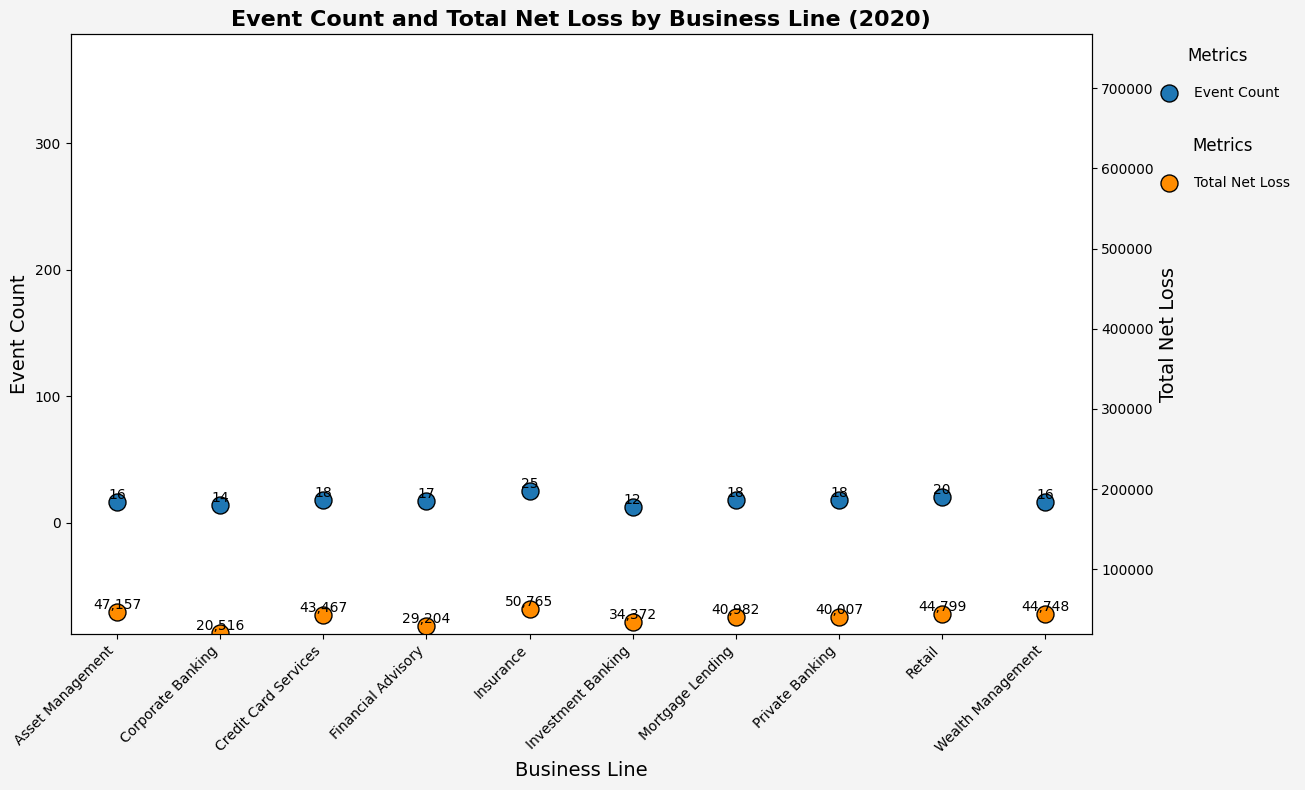

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


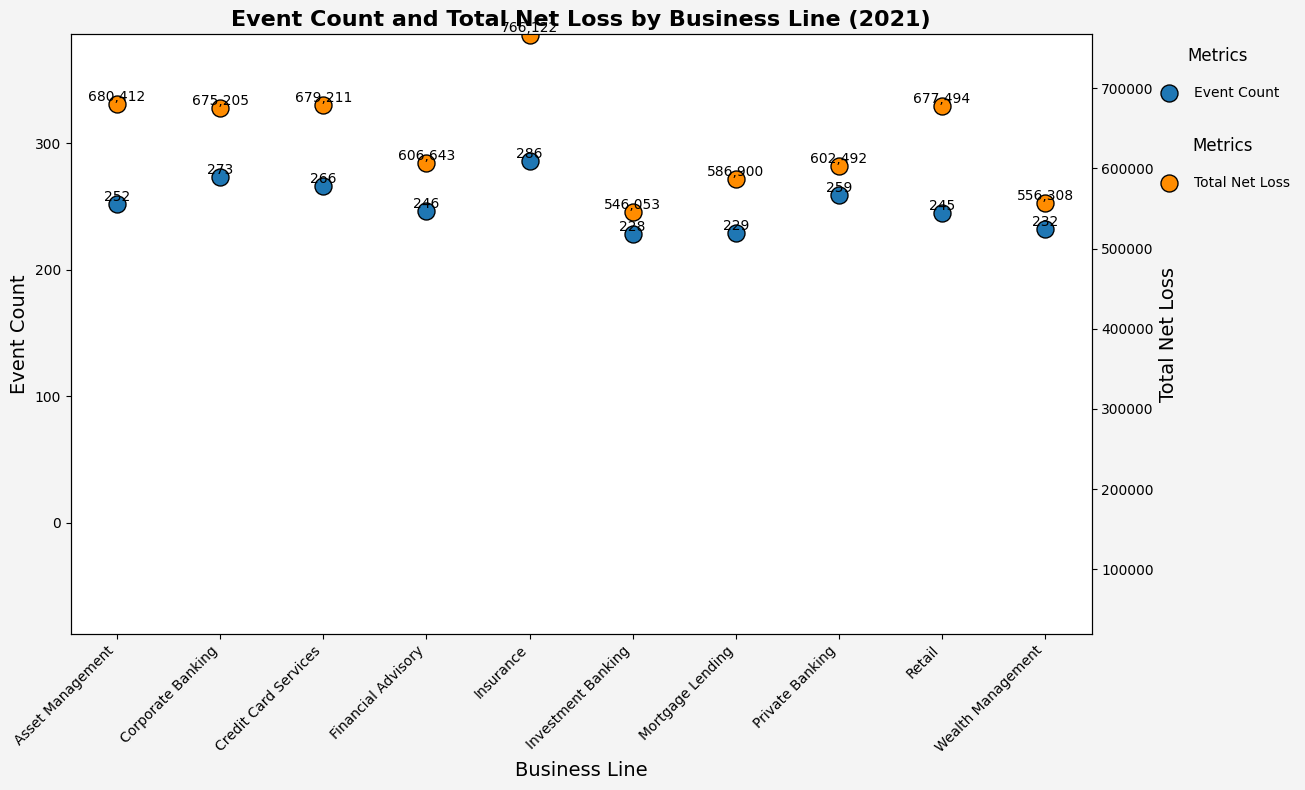

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


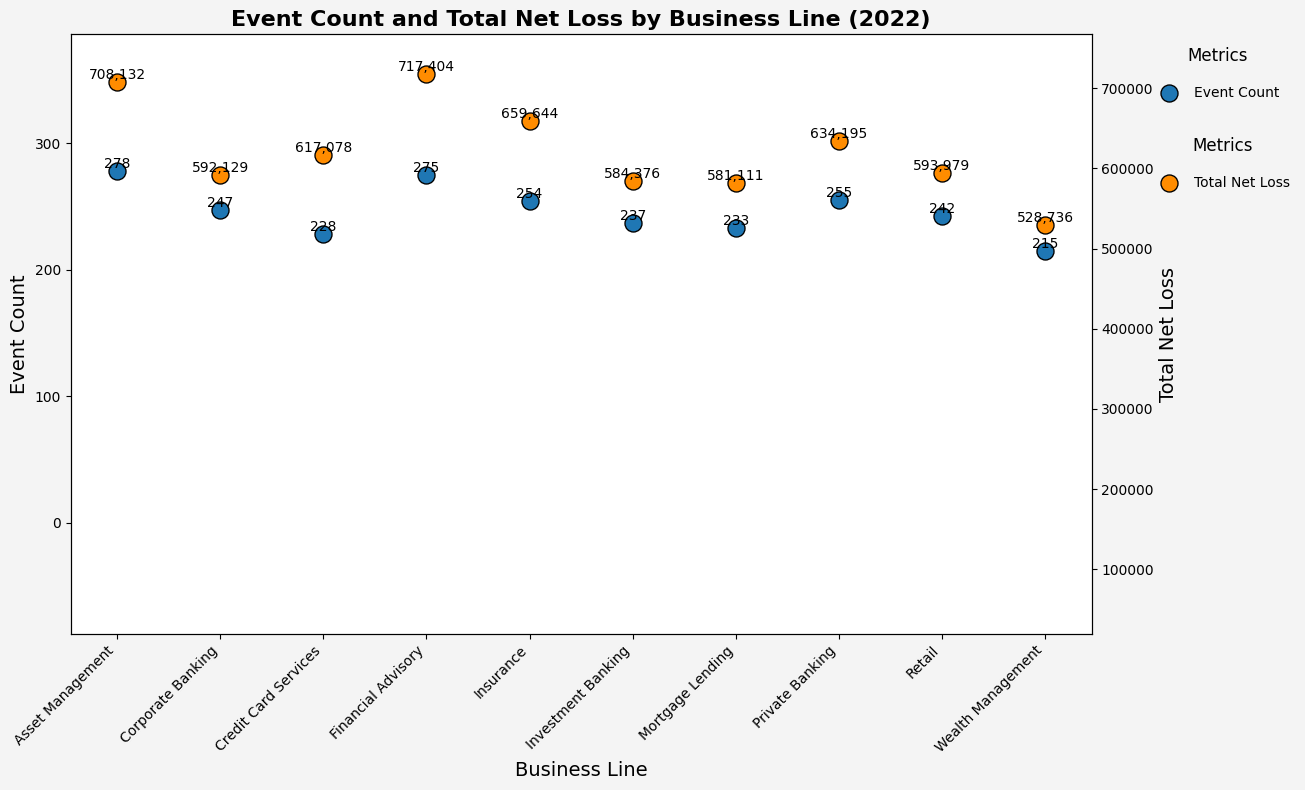

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


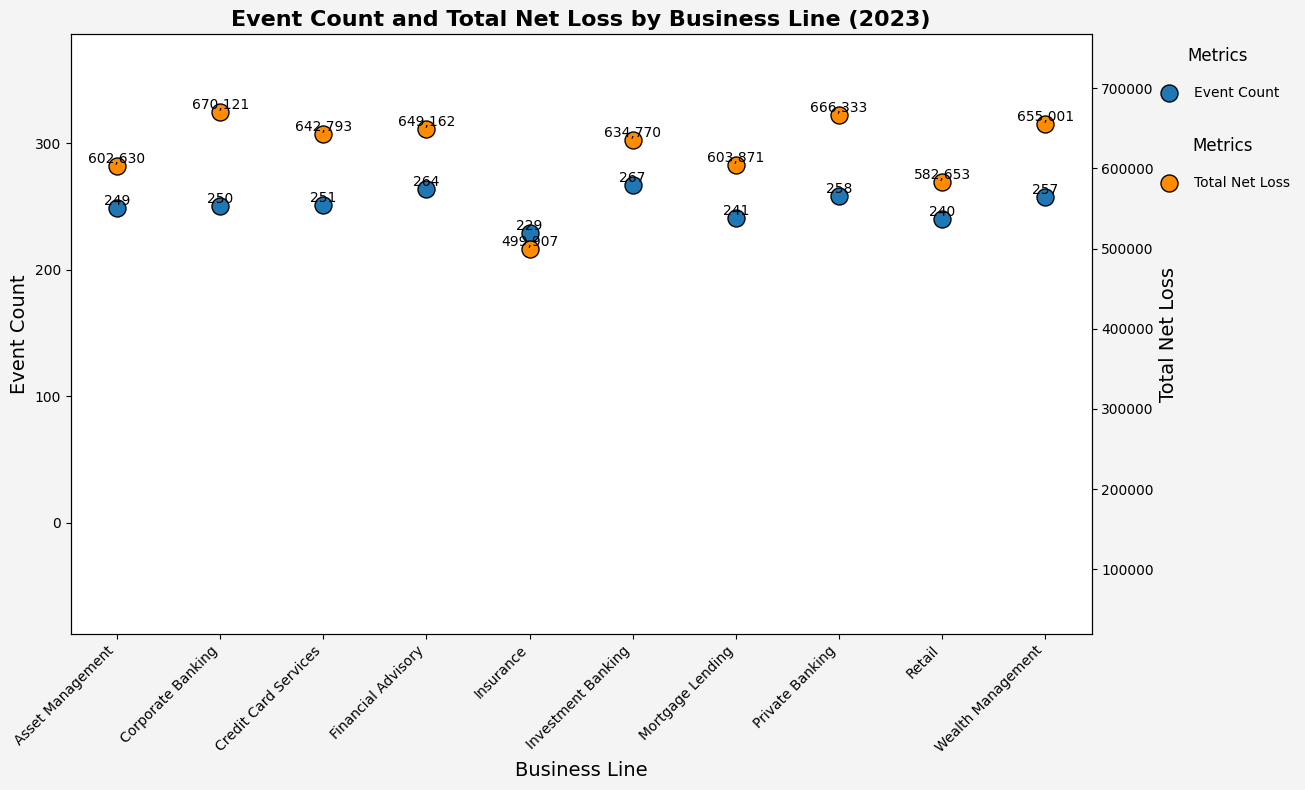

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3832216077.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


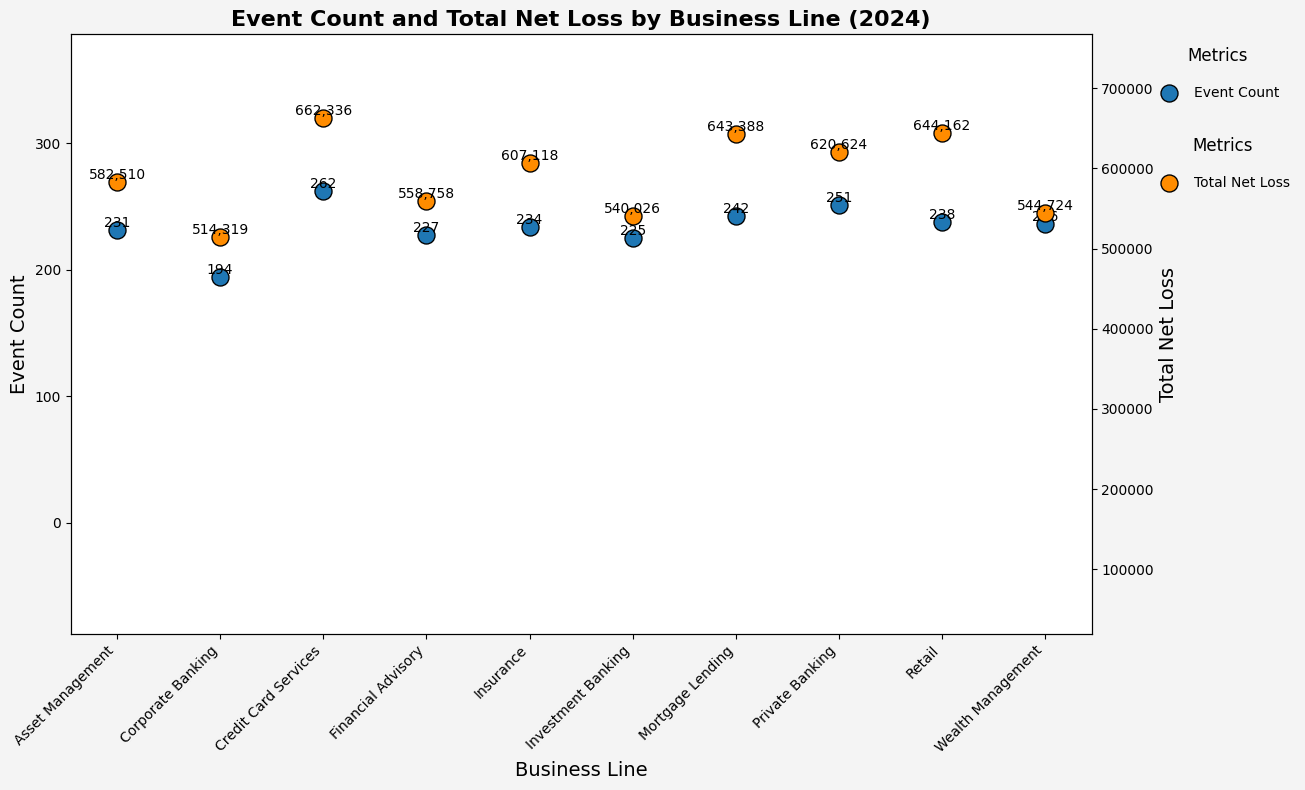

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (either drop or take absolute value)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Group by Business Line and Year, and calculate total Event Count and Net Loss
yearly_summary = df.groupby(["Business Line", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Business Line", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")

    # Set y-axis limits for Event Count (same for all years)
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add values on each point for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Business Line"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set y-axis limits for Total Net Loss (same for all years)
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add values on each point for Total Net Loss
    for i, row in year_data.iterrows():
        ax2.text(
            x=row["Business Line"], 
            y=row["Total_Net_Loss"], 
            s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Business Line ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


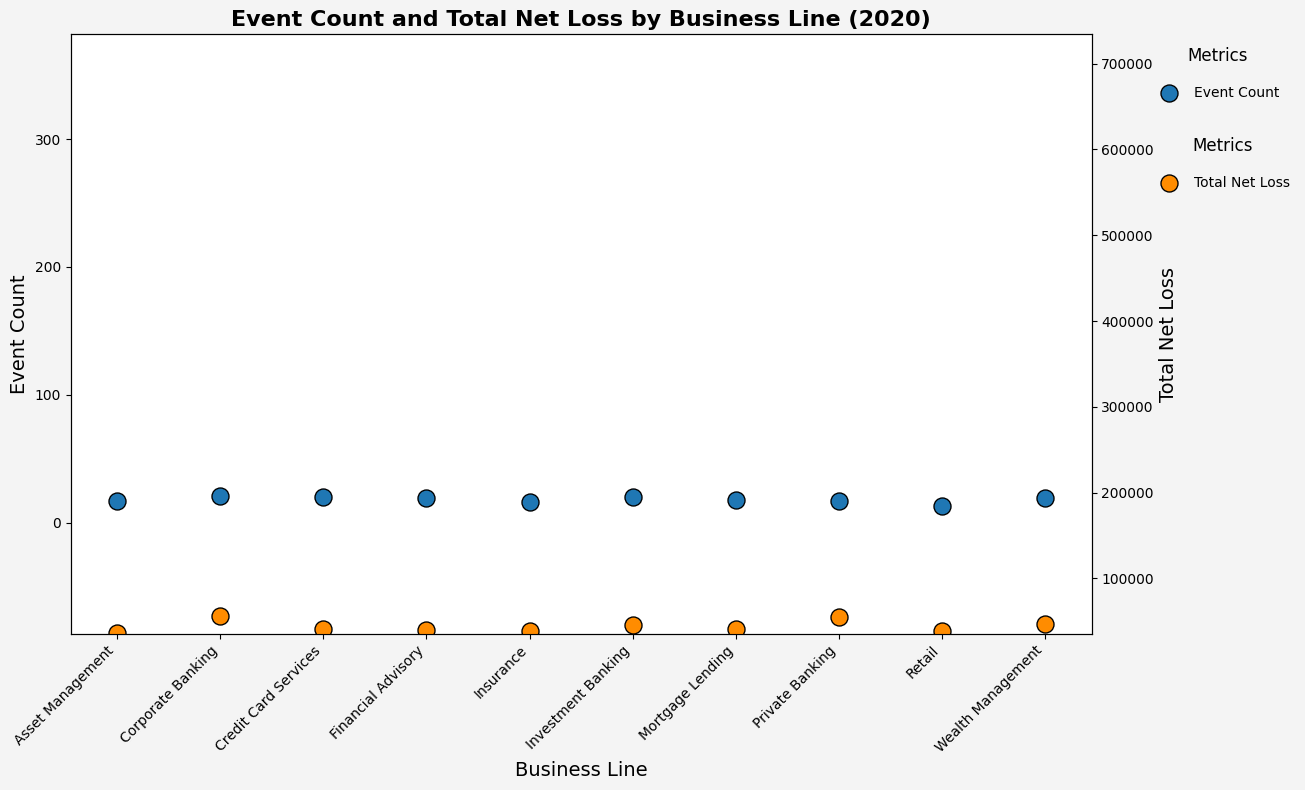

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


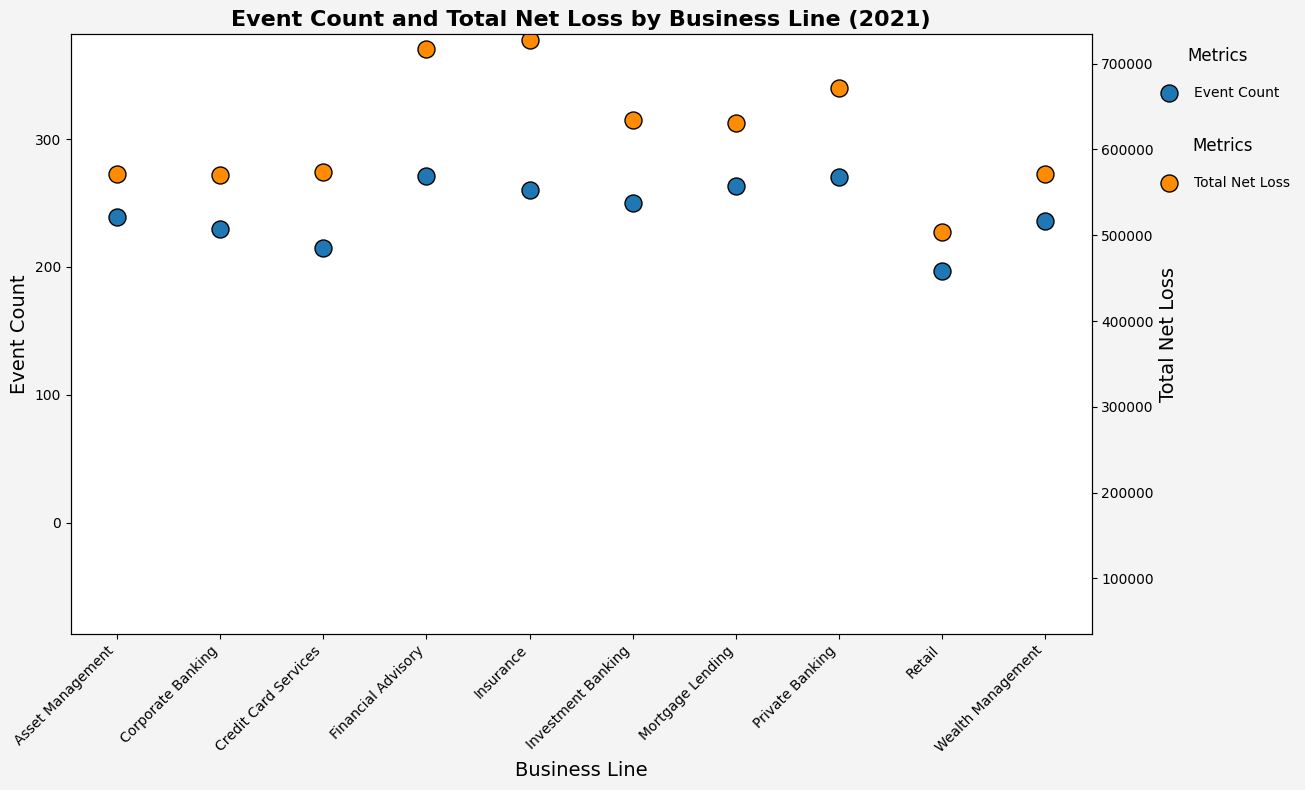

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


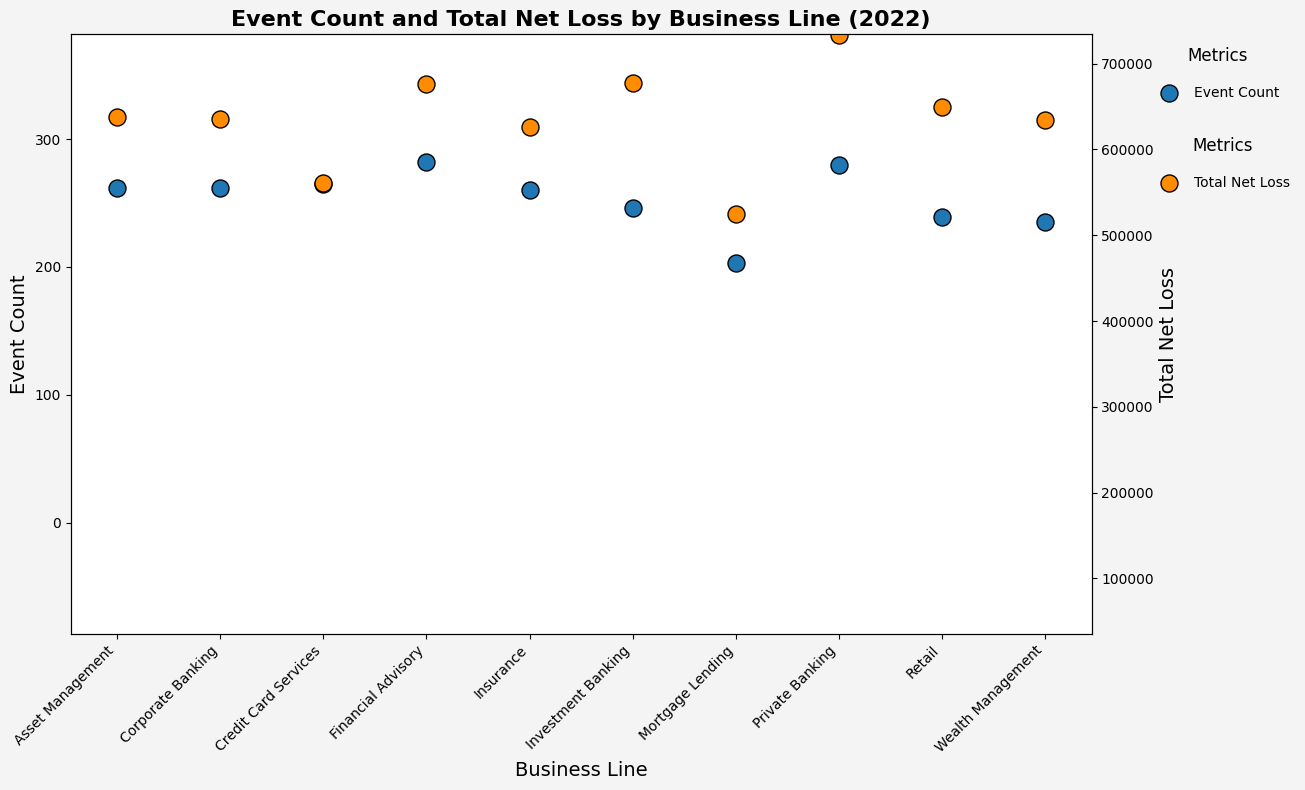

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


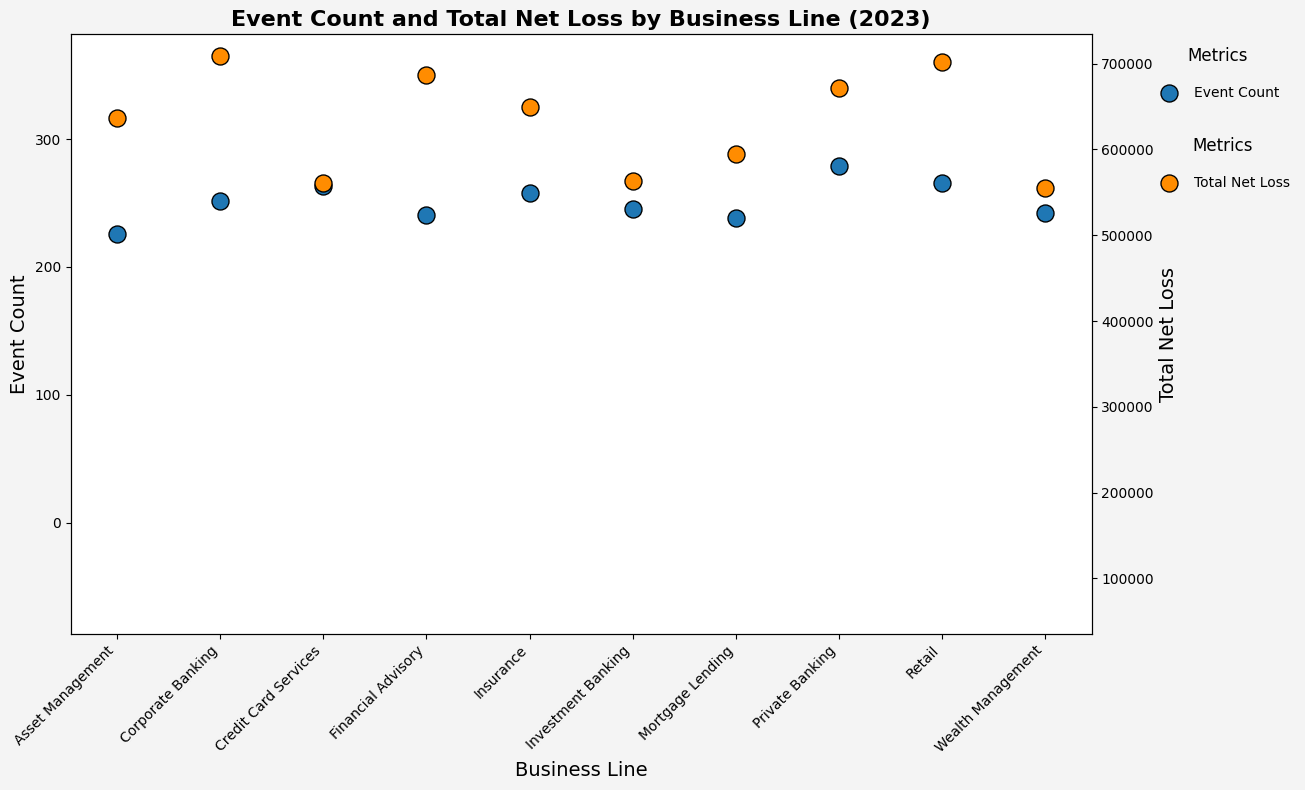

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\3987419125.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


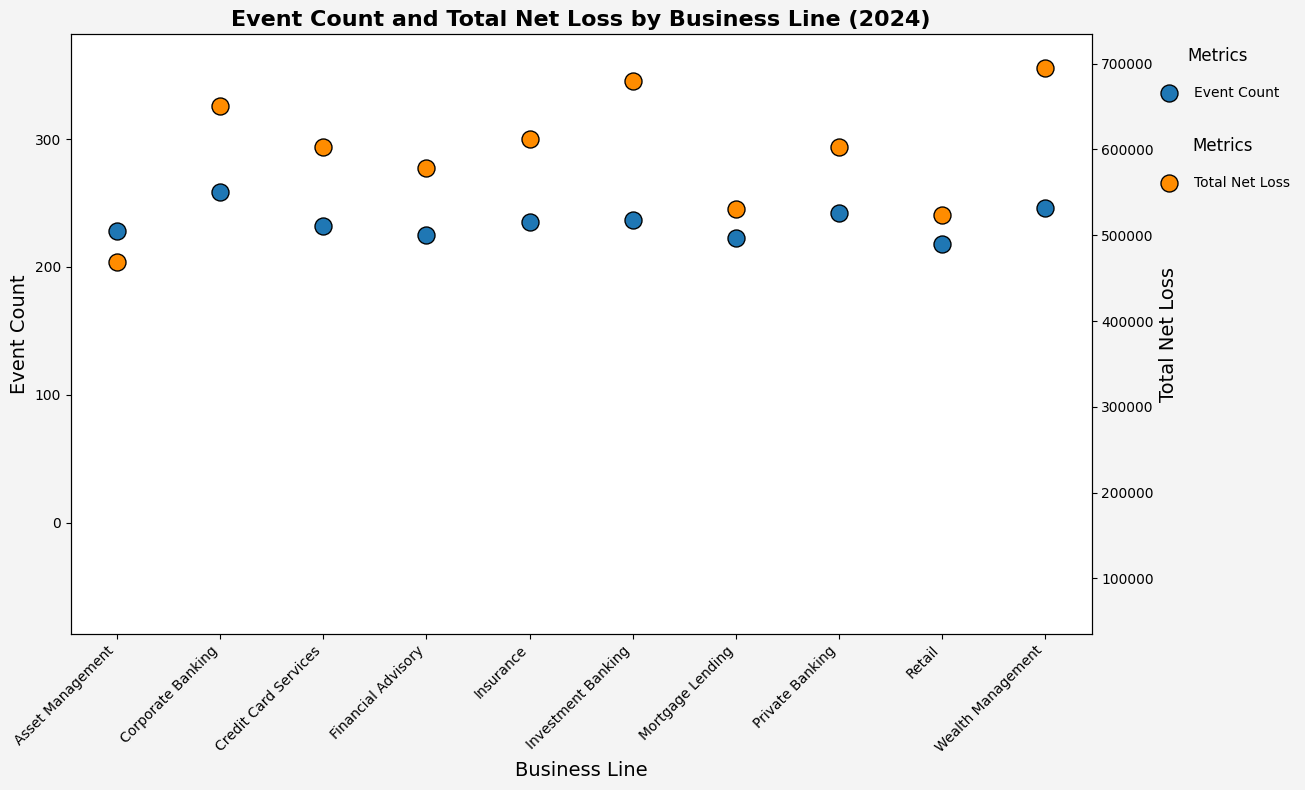

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (either drop or take absolute value)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Group by Business Line and Year, and calculate total Event Count and Net Loss
yearly_summary = df.groupby(["Business Line", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Business Line", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")

    # Set y-axis limits for Event Count (same for all years)
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set y-axis limits for Total Net Loss (same for all years)
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Business Line ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


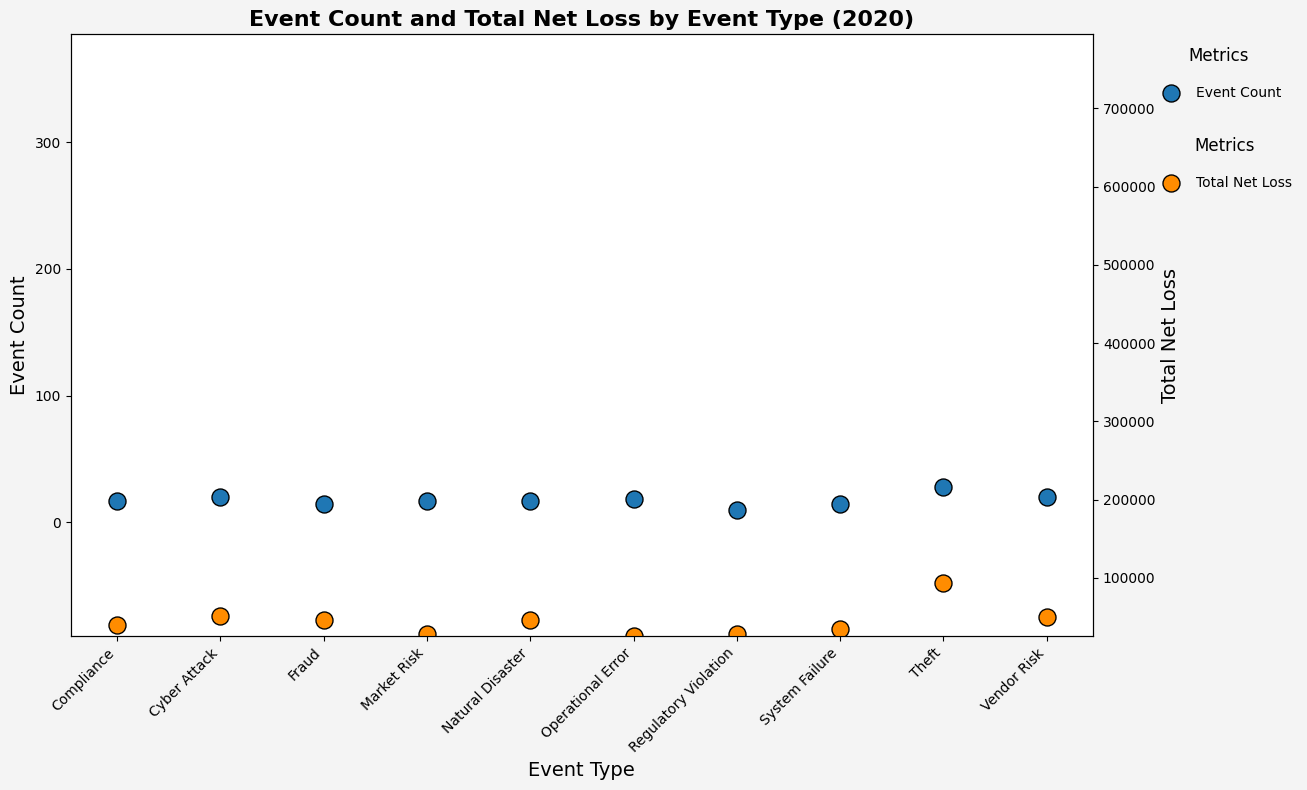

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


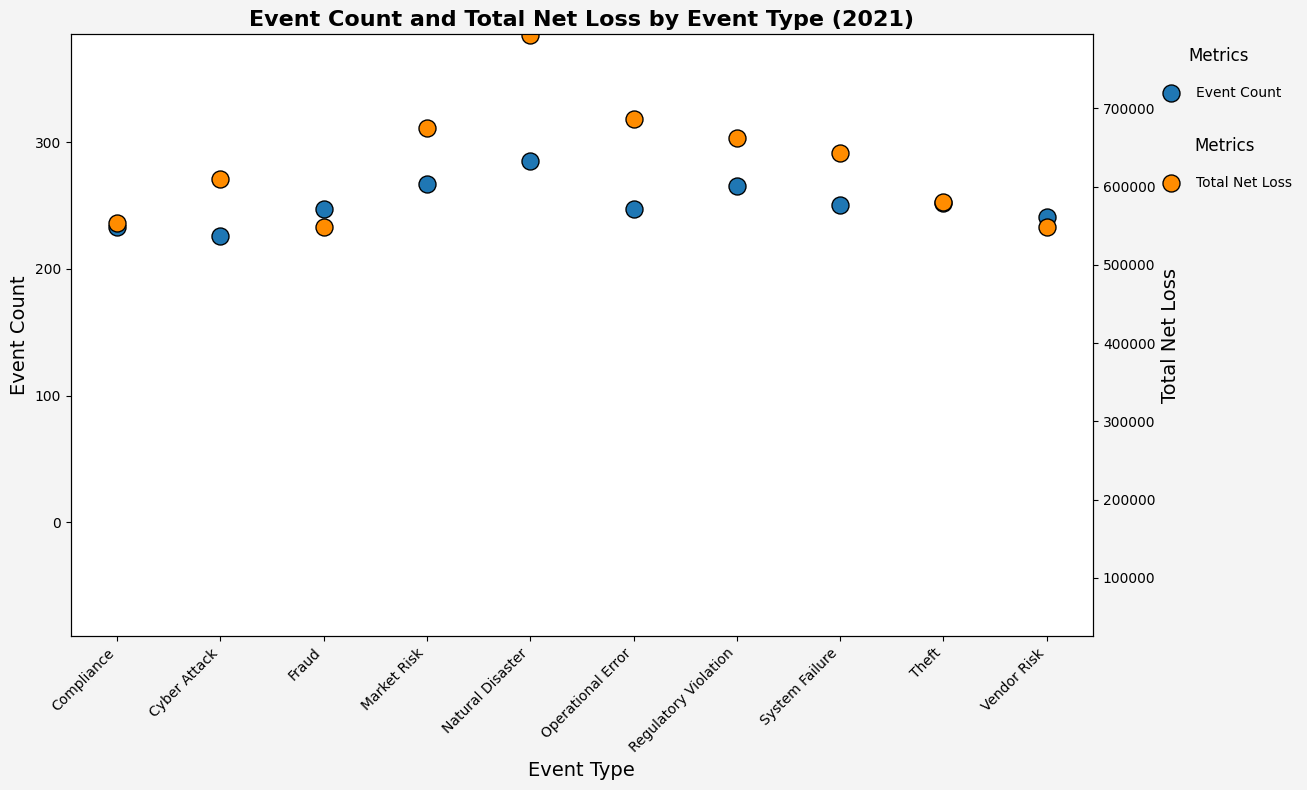

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


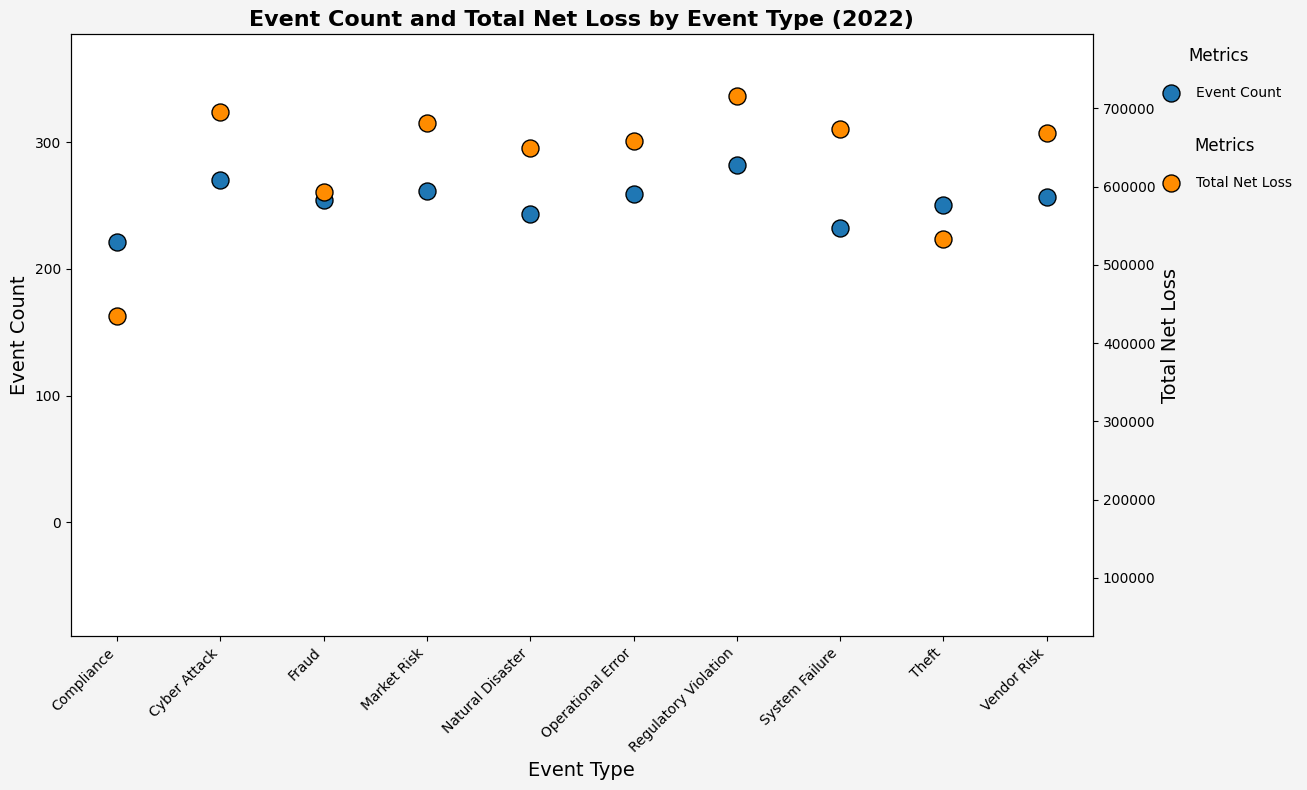

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


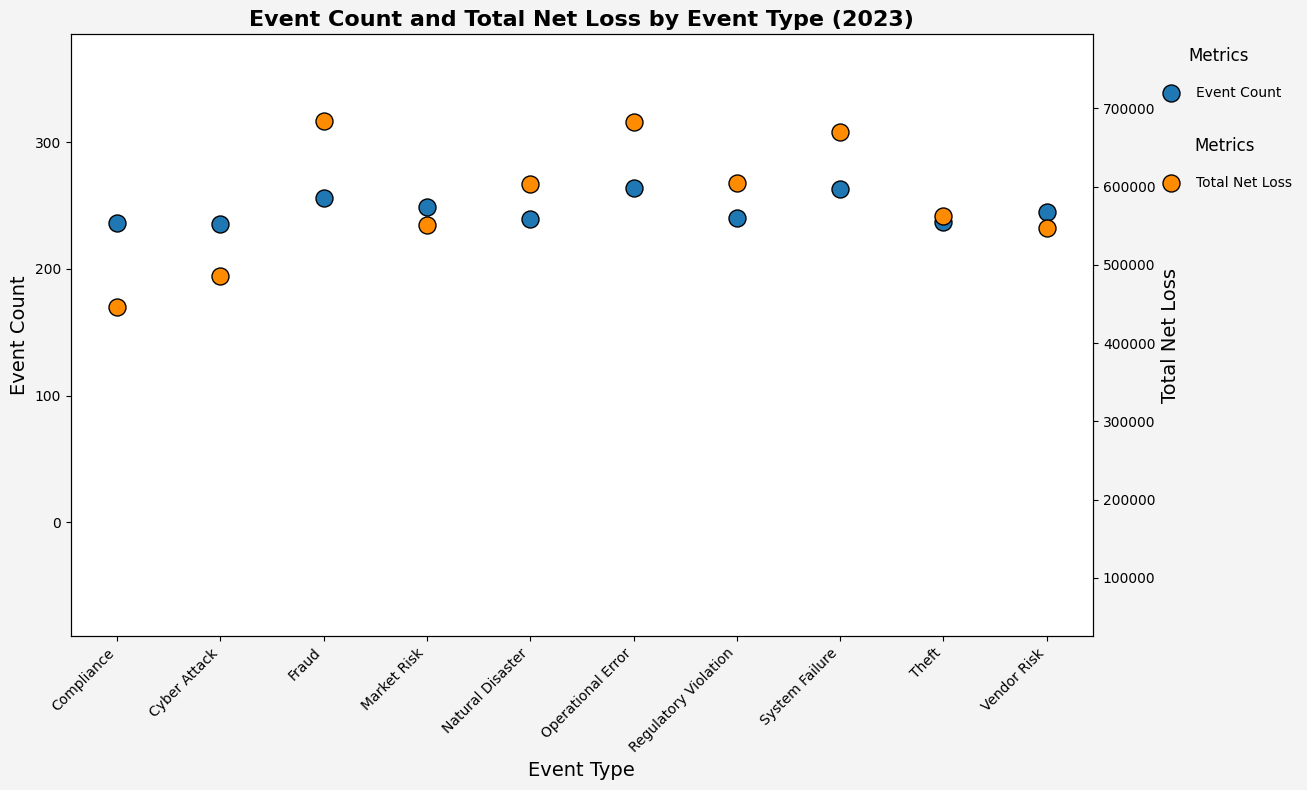

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1632179443.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


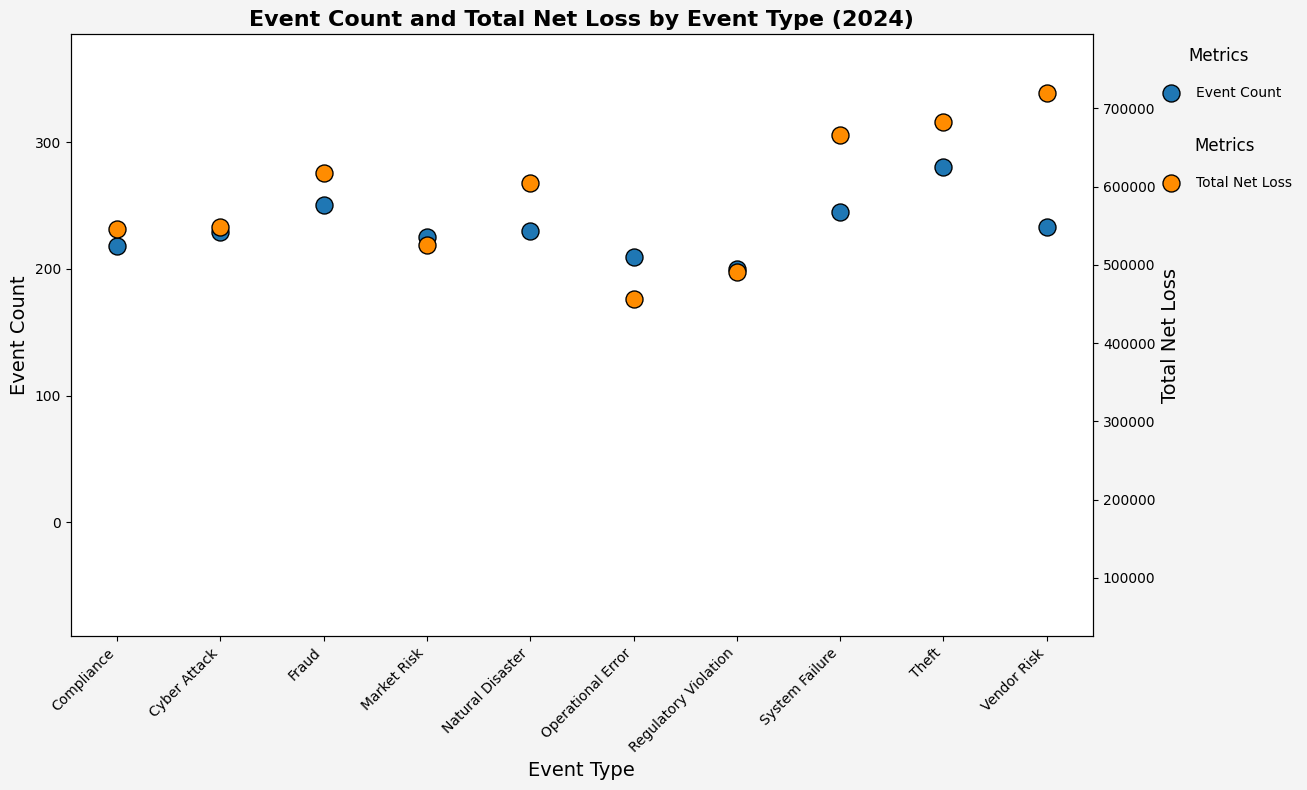

In [11]:
#o modify the plot for Event Type instead of Business Line, you can make the following adjustments in the code:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (either drop or take absolute value)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Group by Event Type and Year, and calculate total Event Count and Net Loss
yearly_summary = df.groupby(["Event Type", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Event Type",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Event Type", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")

    # Set y-axis limits for Event Count (same for all years)
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Event Type",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set y-axis limits for Total Net Loss (same for all years)
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Event Type ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


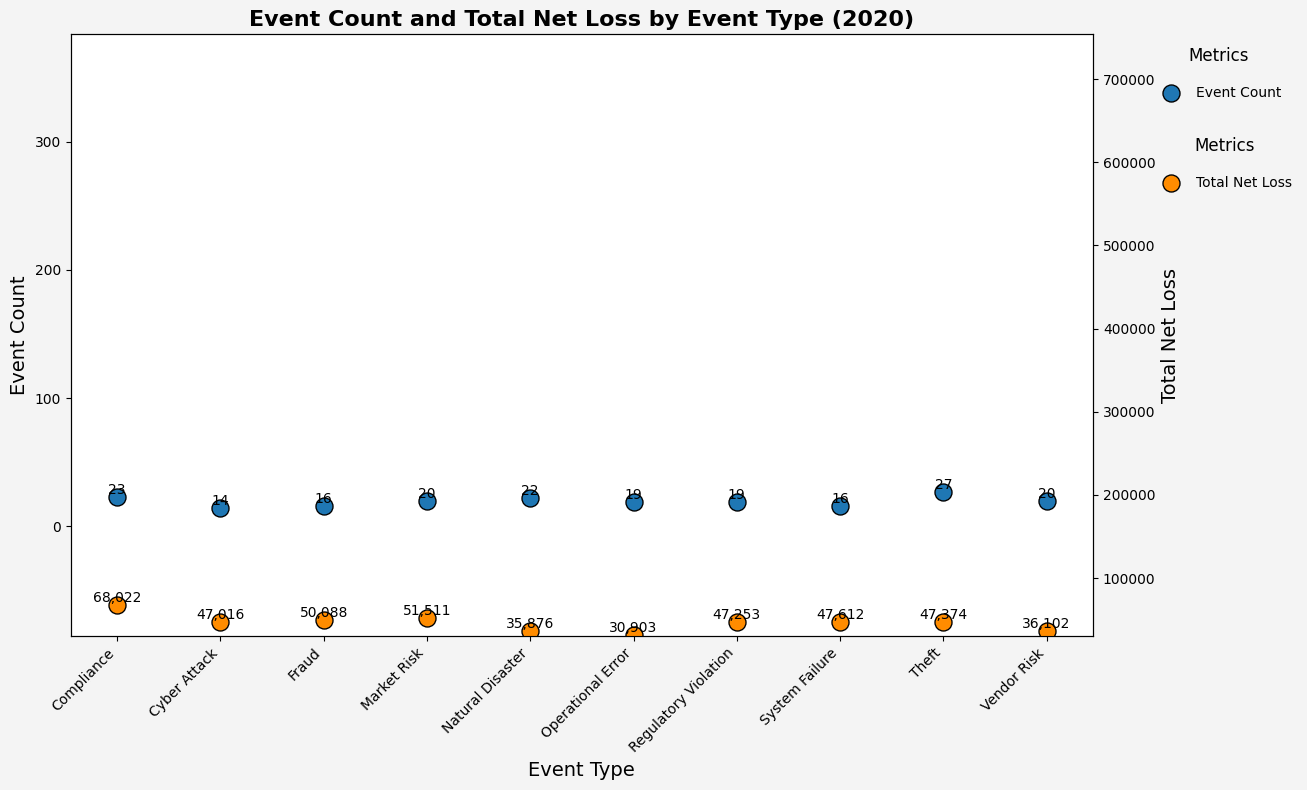

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


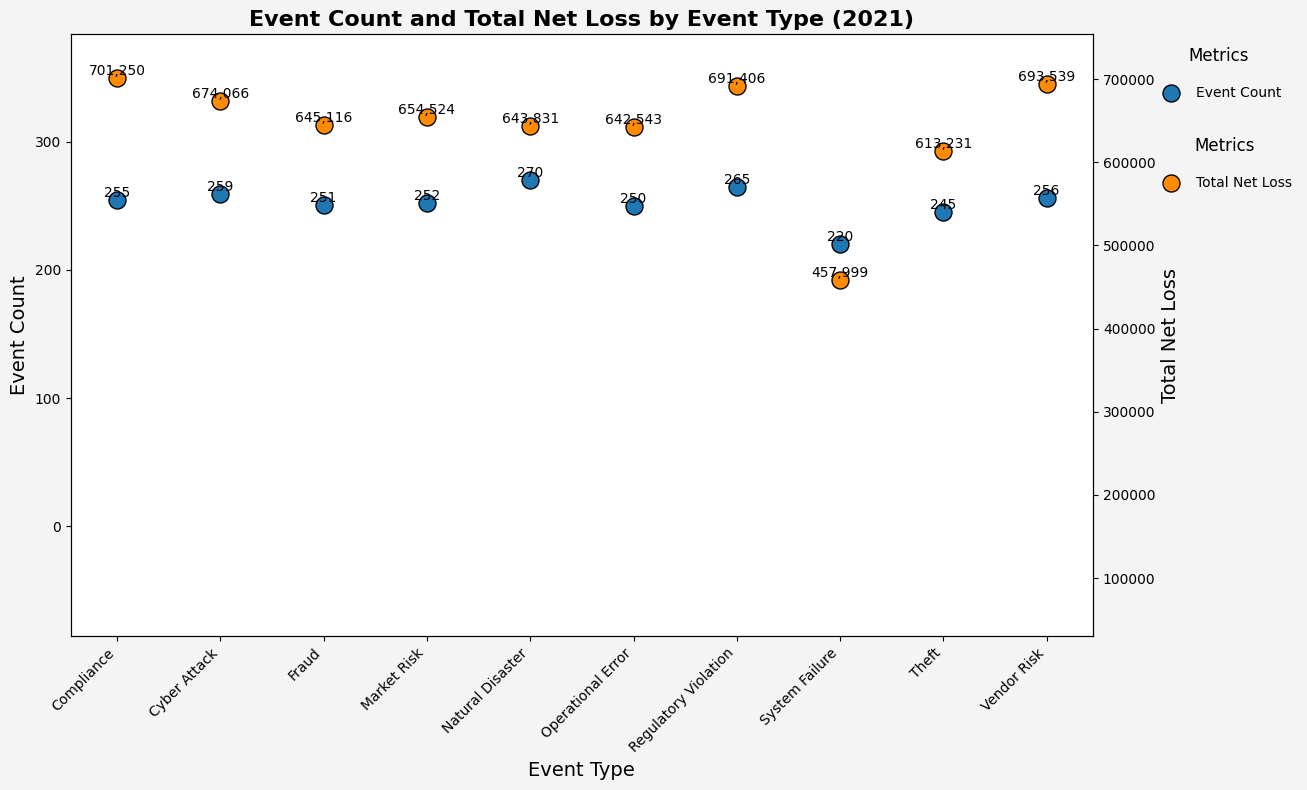

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


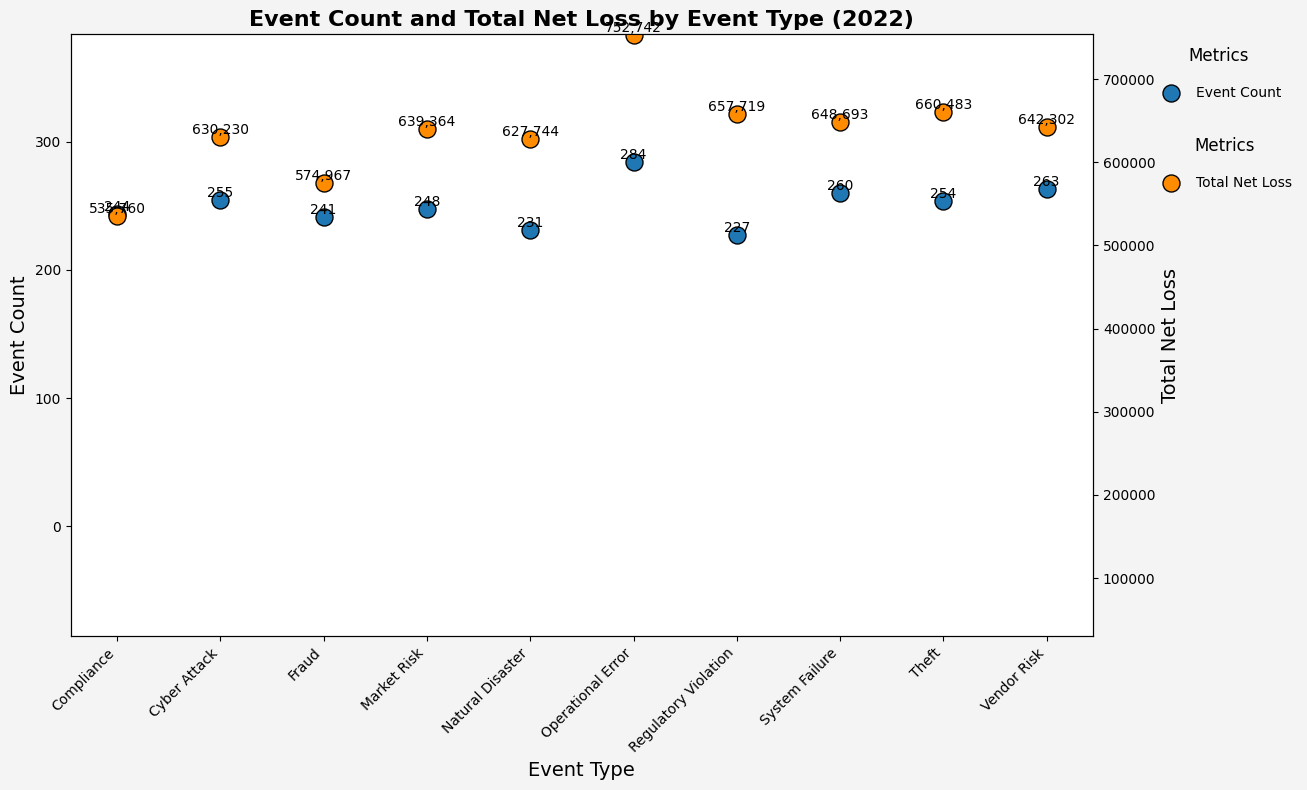

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


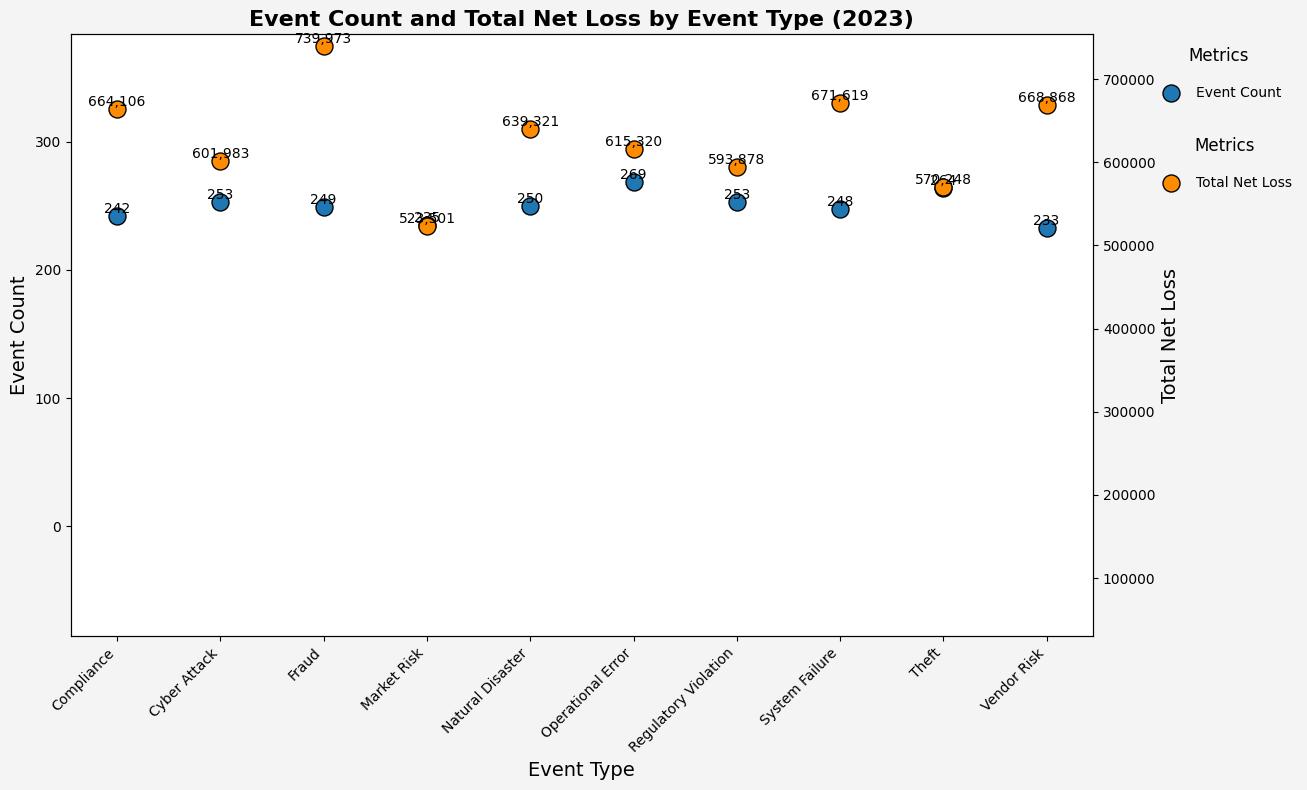

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:83: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\4177120501.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


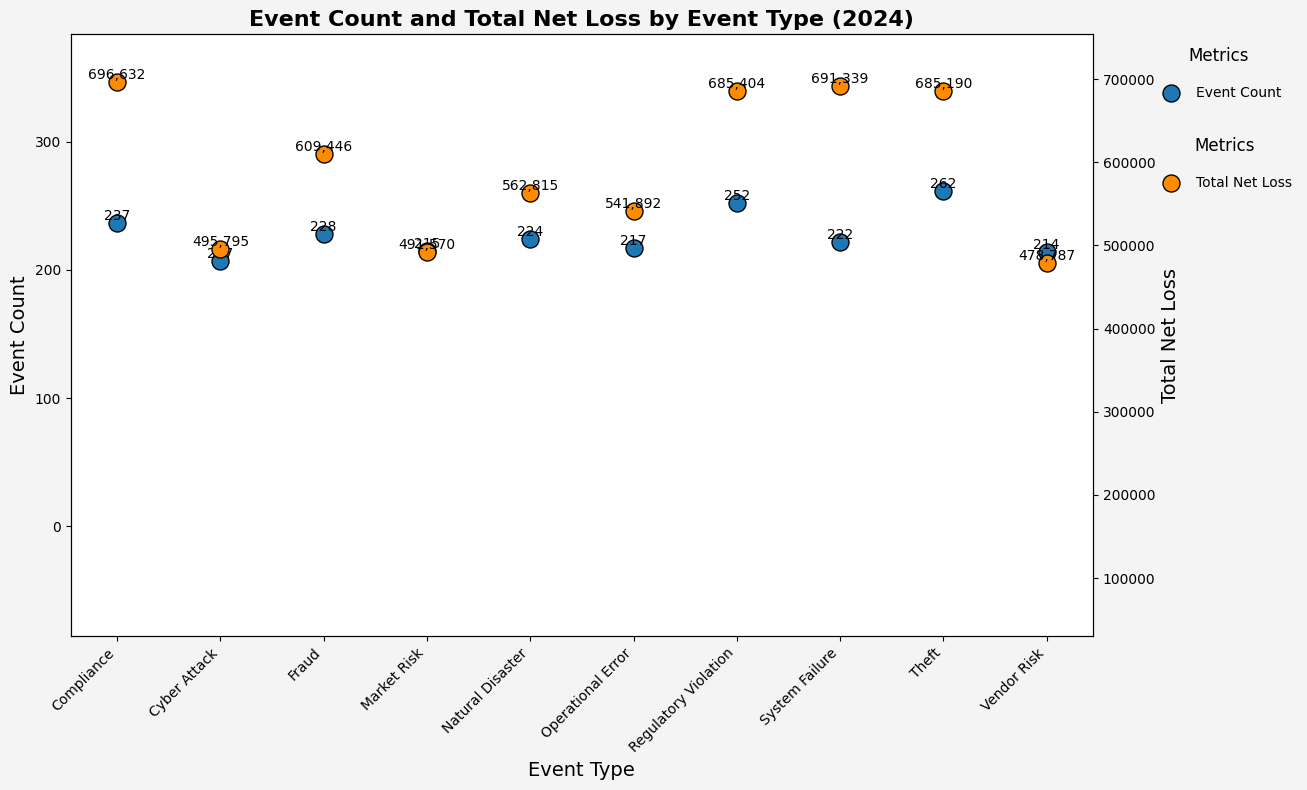

In [12]:
#with label
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (either drop or take absolute value)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Group by Event Type and Year, and calculate total Event Count and Net Loss
yearly_summary = df.groupby(["Event Type", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Event Type",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Event Type", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")

    # Set y-axis limits for Event Count (same for all years)
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add labels for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Event Type"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Event Type",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set y-axis limits for Total Net Loss (same for all years)
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add labels for Total Net Loss
    for i, row in year_data.iterrows():
        ax2.text(
            x=row["Event Type"], 
            y=row["Total_Net_Loss"], 
            s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Event Type ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


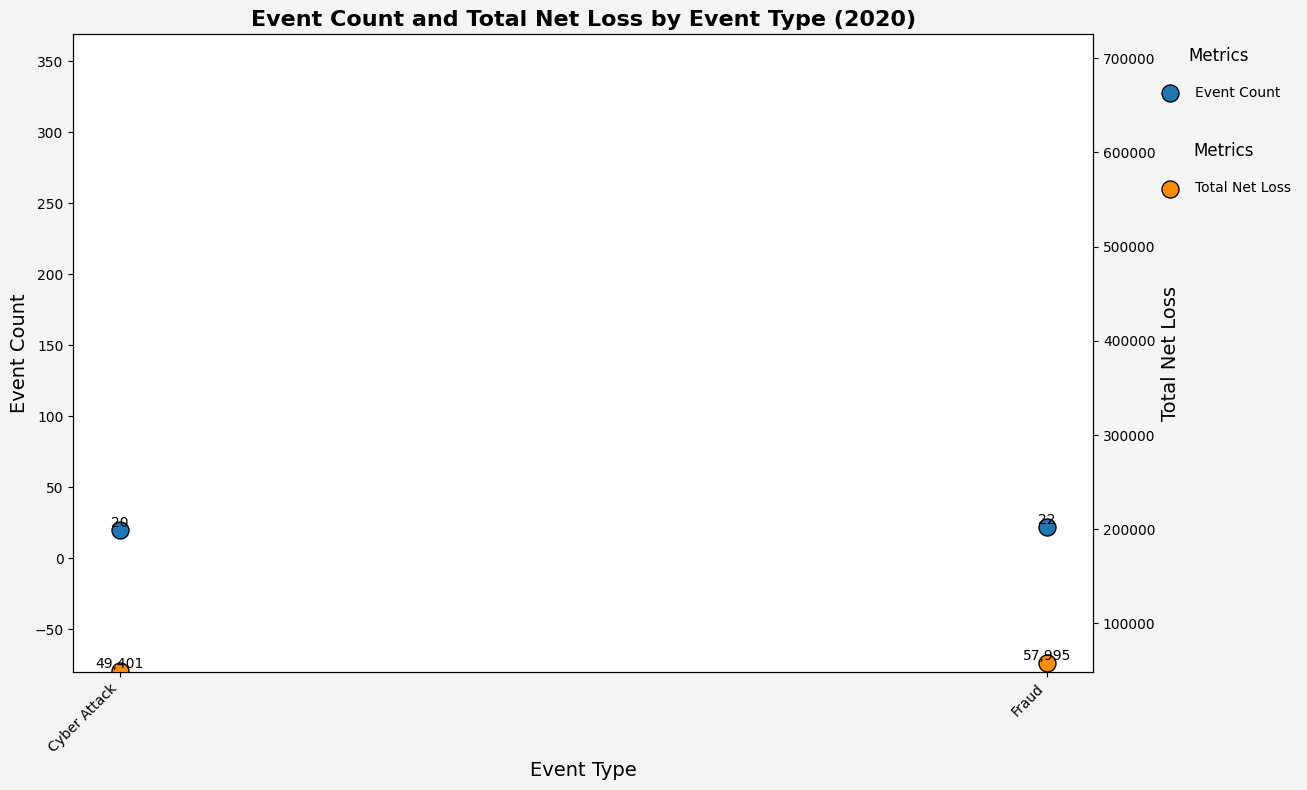

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


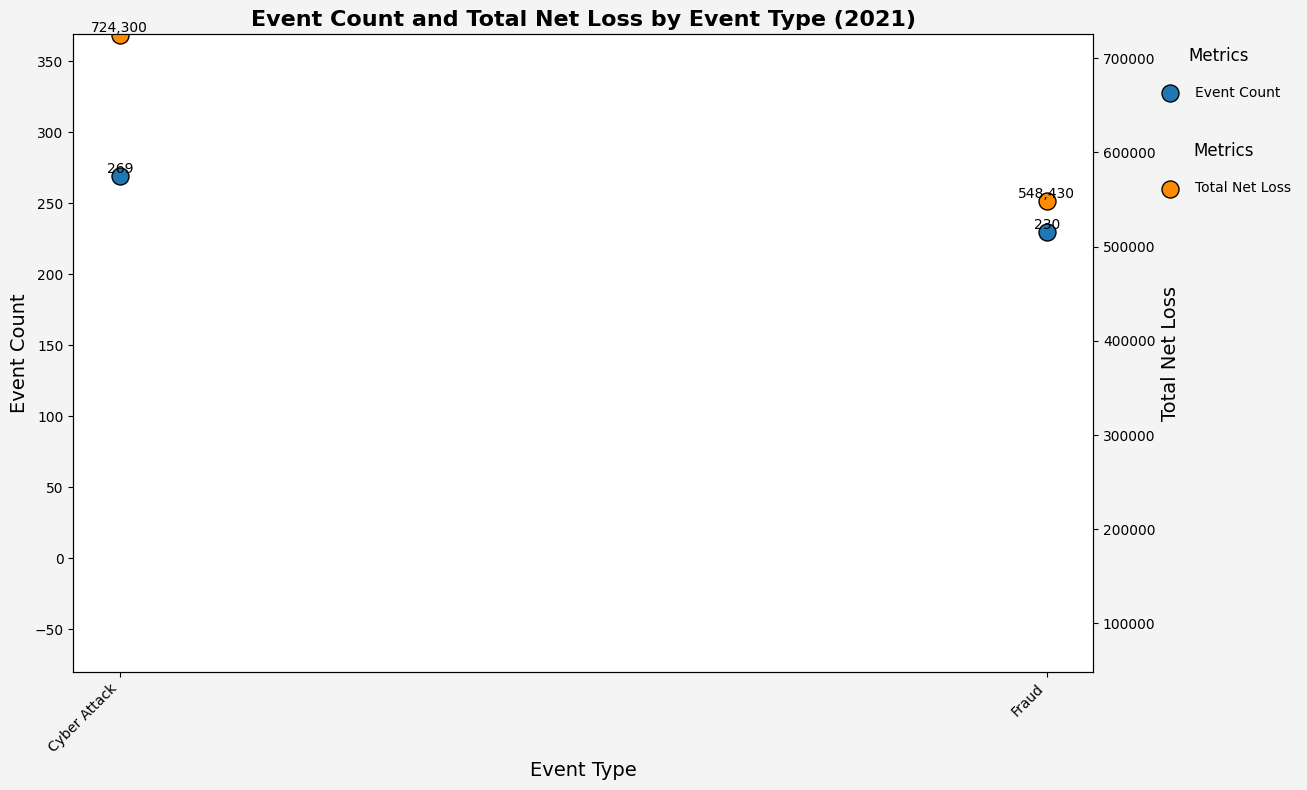

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


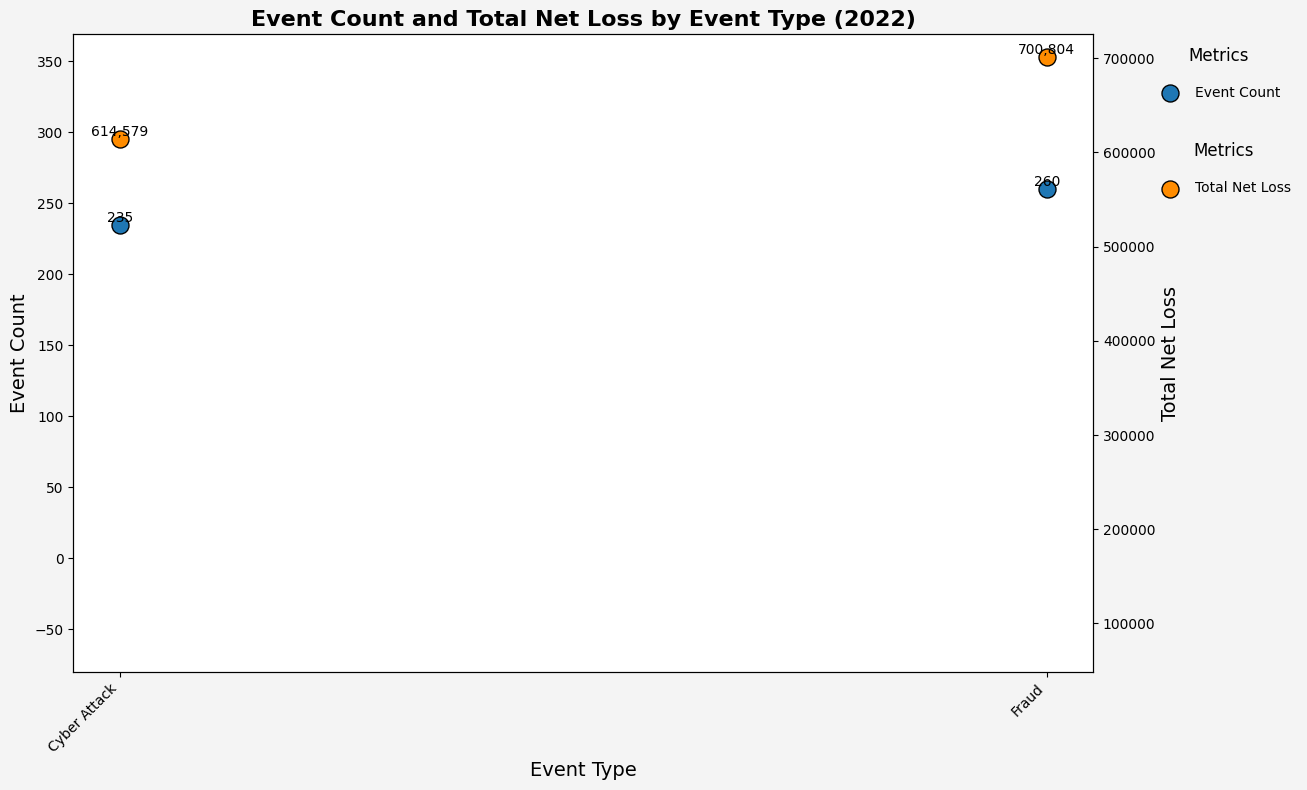

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


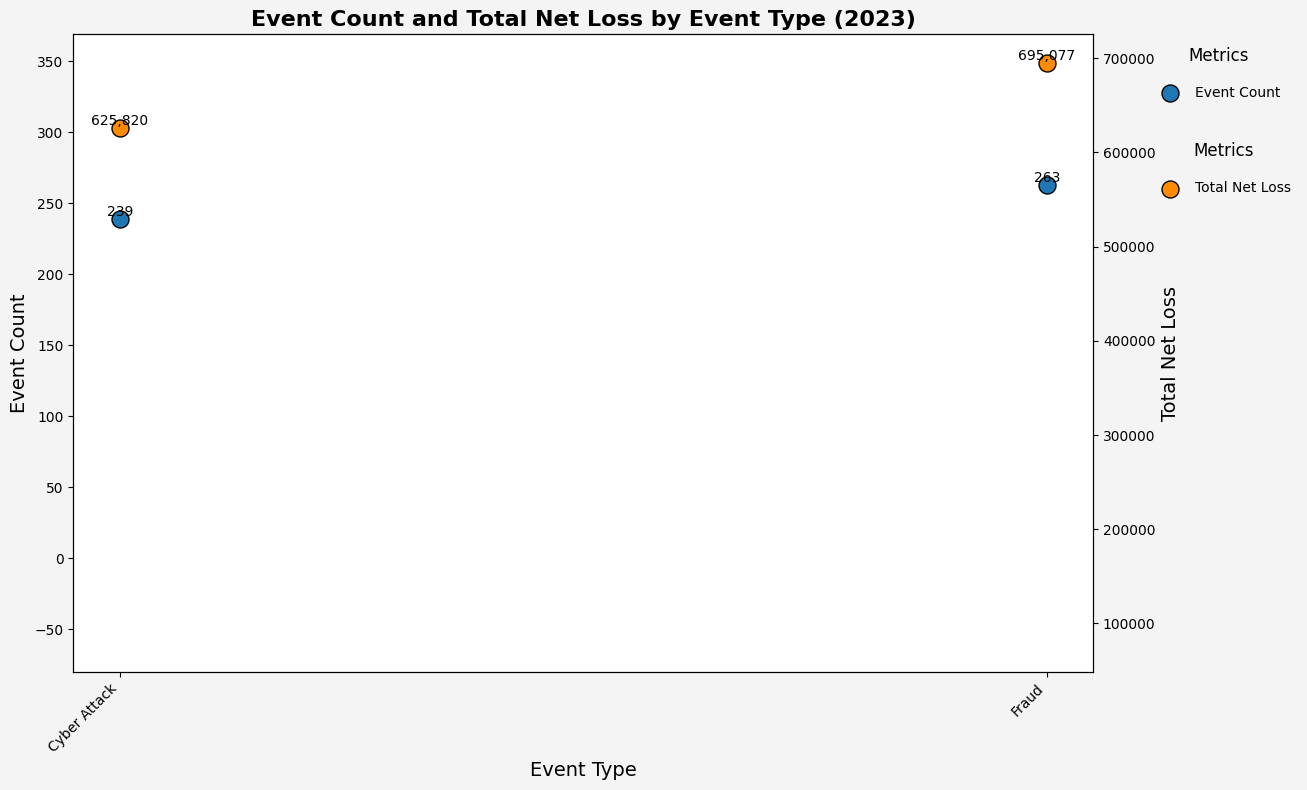

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\2776808033.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")


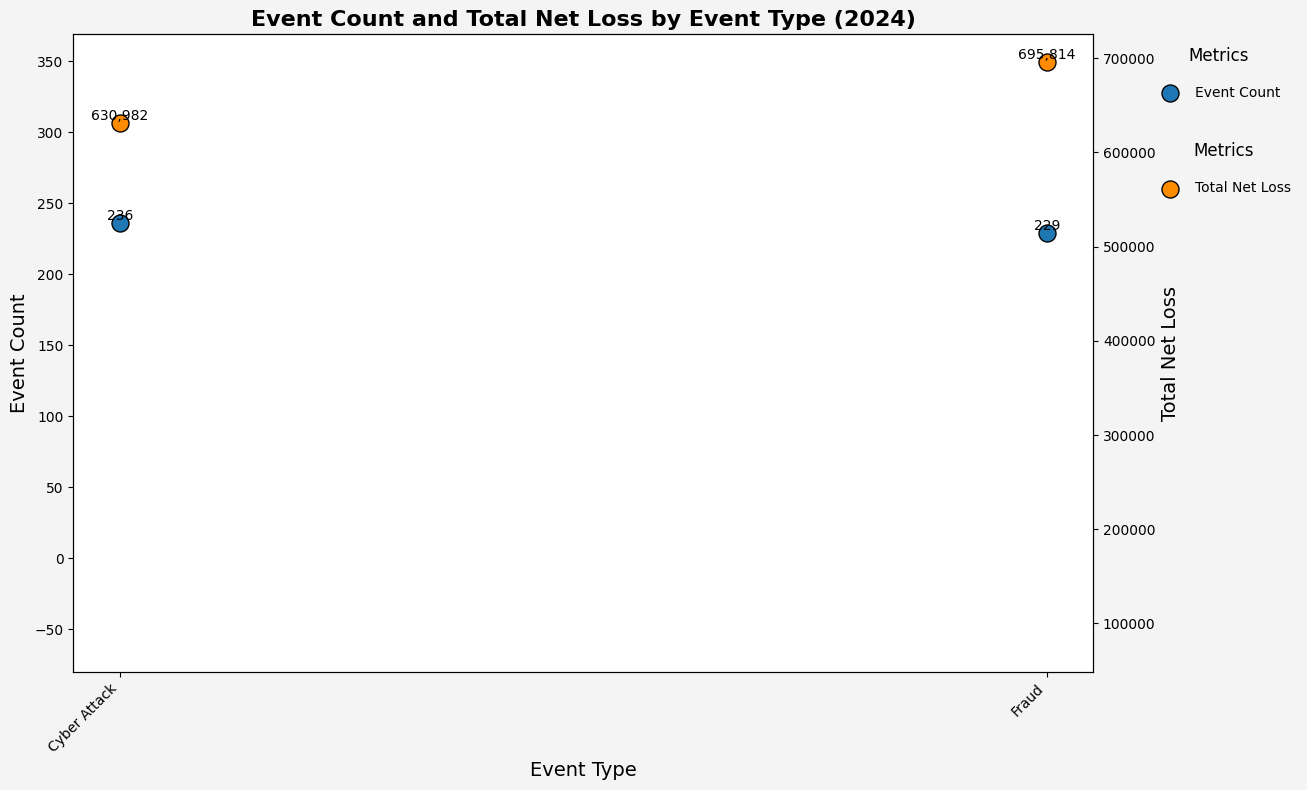

In [14]:
#only two category
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (either drop or take absolute value)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Filter for two specific event types
filtered_event_types = ["Fraud", "Cyber Attack"]  # Specify the event types you are interested in
filtered_df = df[df['Event Type'].isin(filtered_event_types)]

# Group by Event Type and Year, and calculate total Event Count and Net Loss
yearly_summary = filtered_df.groupby(["Event Type", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Event Type",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Event Type", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Event Type"], rotation=45, ha="right")

    # Set y-axis limits for Event Count (same for all years)
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add labels for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Event Type"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Event Type",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set y-axis limits for Total Net Loss (same for all years)
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add labels for Total Net Loss
    for i, row in year_data.iterrows():
        ax2.text(
            x=row["Event Type"], 
            y=row["Total_Net_Loss"], 
            s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Event Type ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:87: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


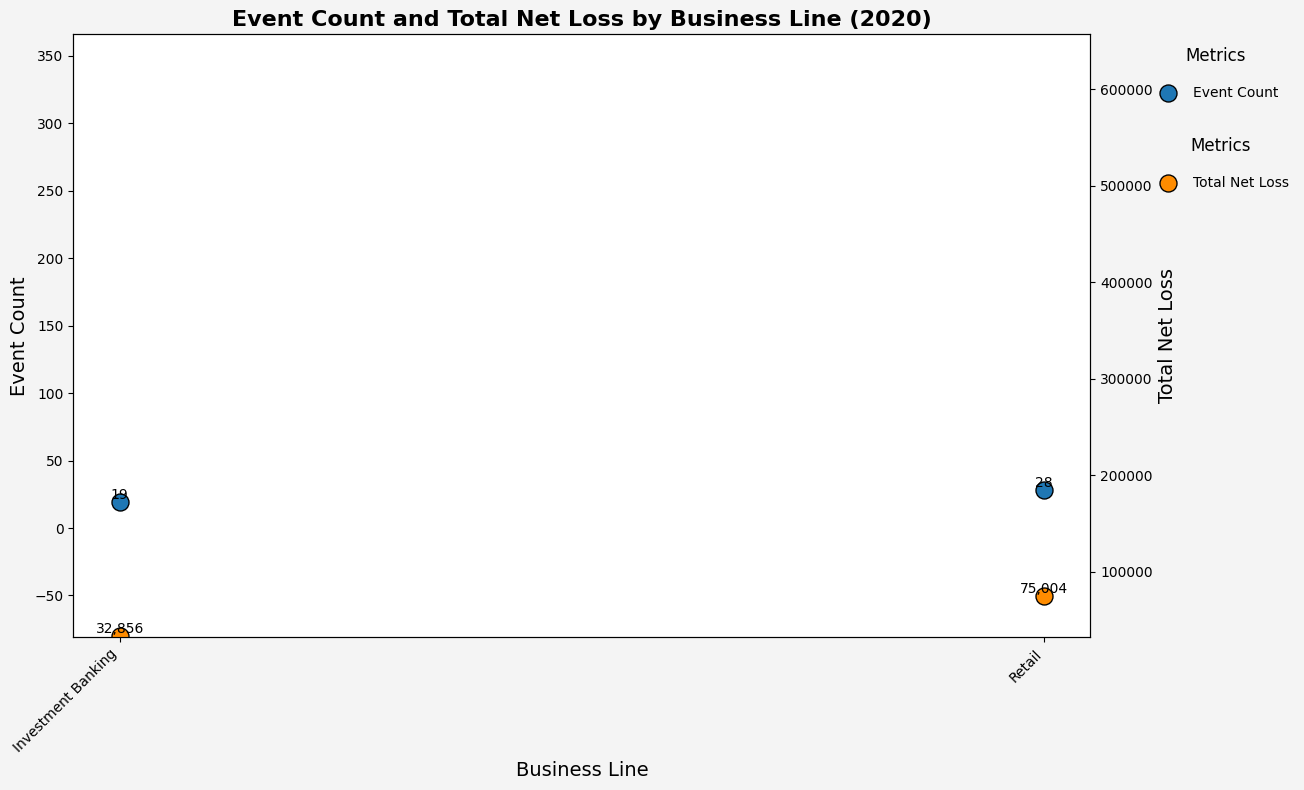

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:87: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


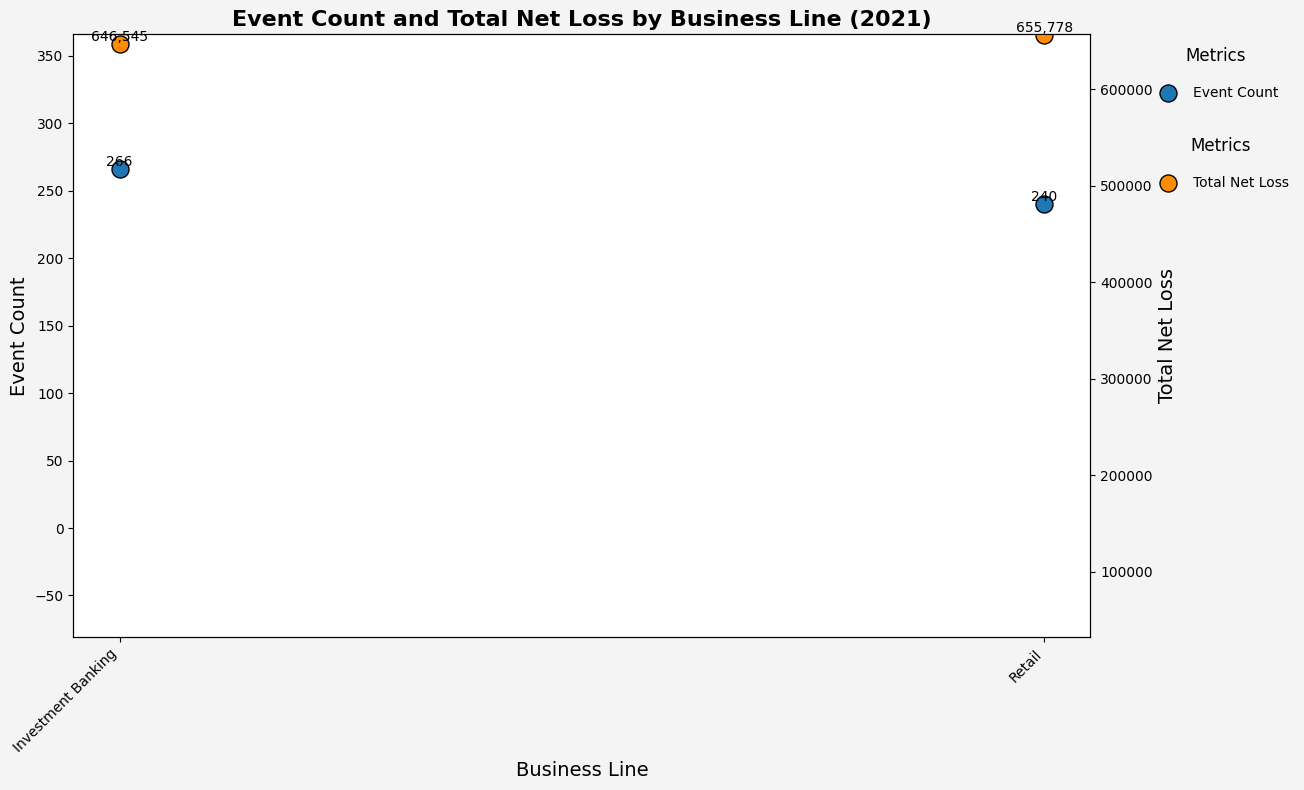

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:87: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


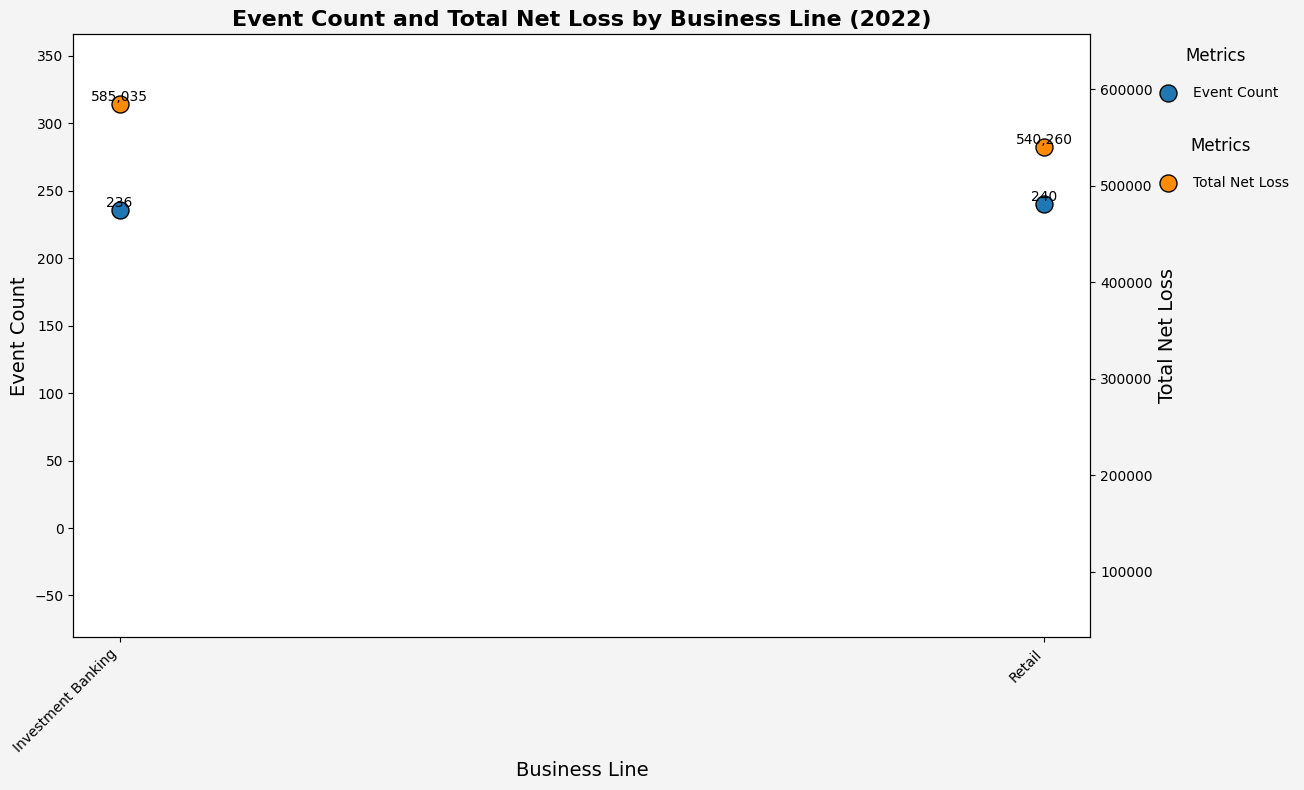

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:87: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


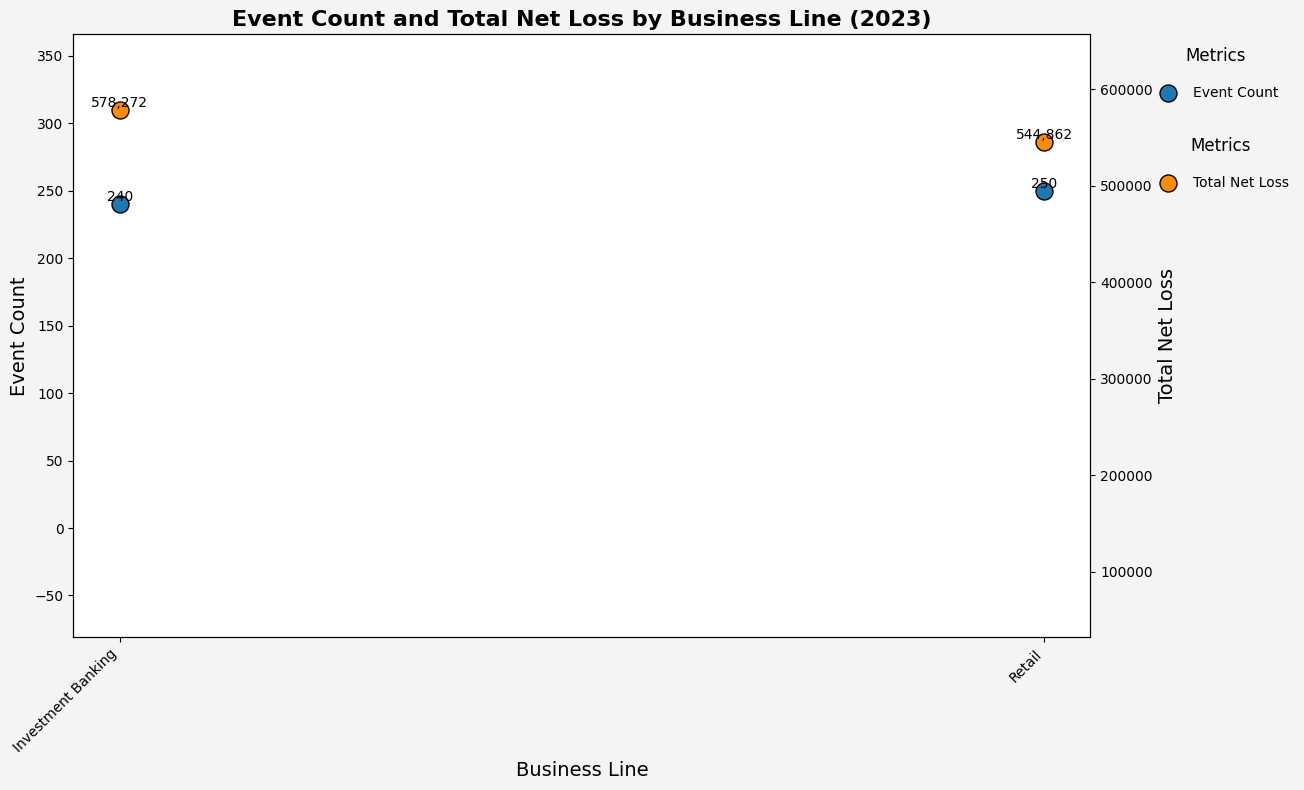

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:87: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1616247807.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


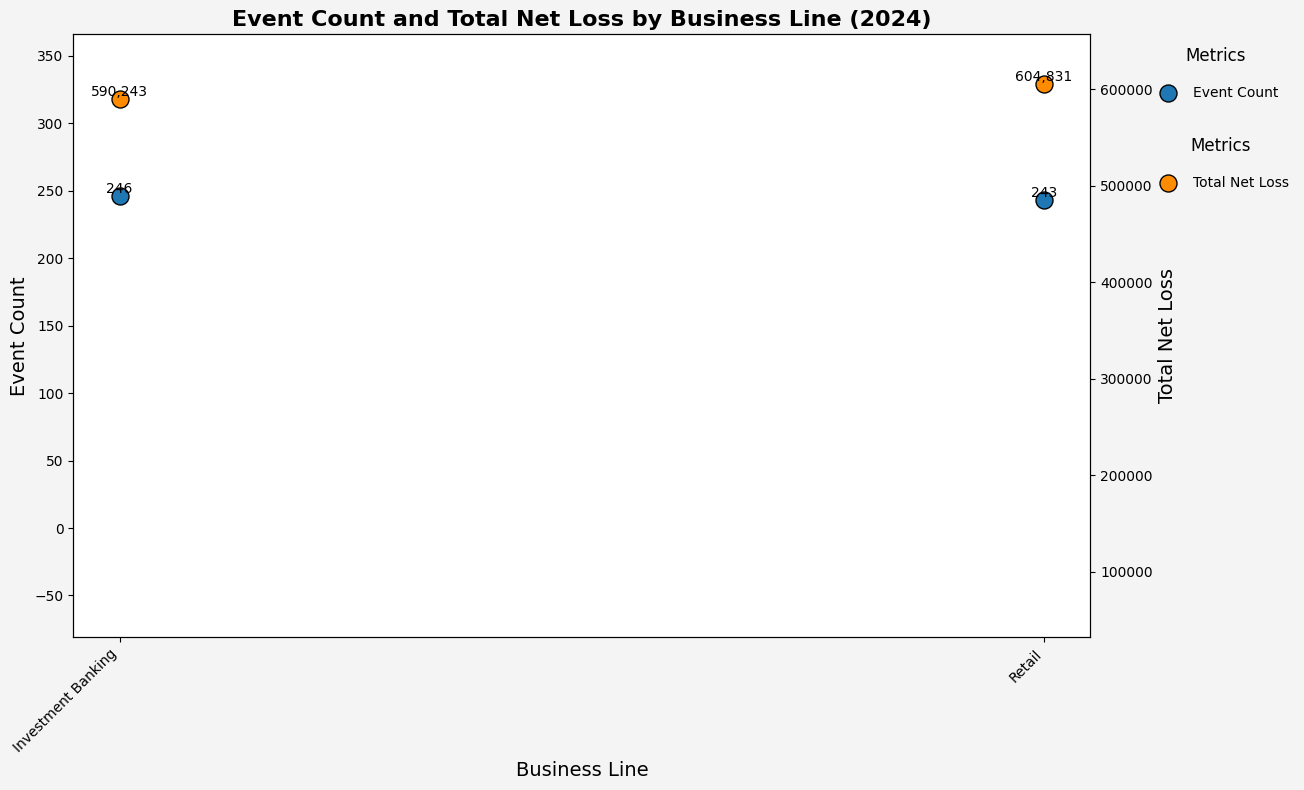

In [15]:
#two business line
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (either drop or take absolute value)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Filter for two specific business lines
filtered_business_lines = ["Retail", "Investment Banking"]  # Specify the business lines you are interested in
filtered_df = df[df['Business Line'].isin(filtered_business_lines)]

# Group by Business Line and Year, and calculate total Event Count and Net Loss
yearly_summary = filtered_df.groupby(["Business Line", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Business Line", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")

    # Set y-axis limits for Event Count (same for all years)
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add labels for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Business Line"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set y-axis limits for Total Net Loss (same for all years)
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add labels for Total Net Loss
    for i, row in year_data.iterrows():
        ax2.text(
            x=row["Business Line"], 
            y=row["Total_Net_Loss"], 
            s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Business Line ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


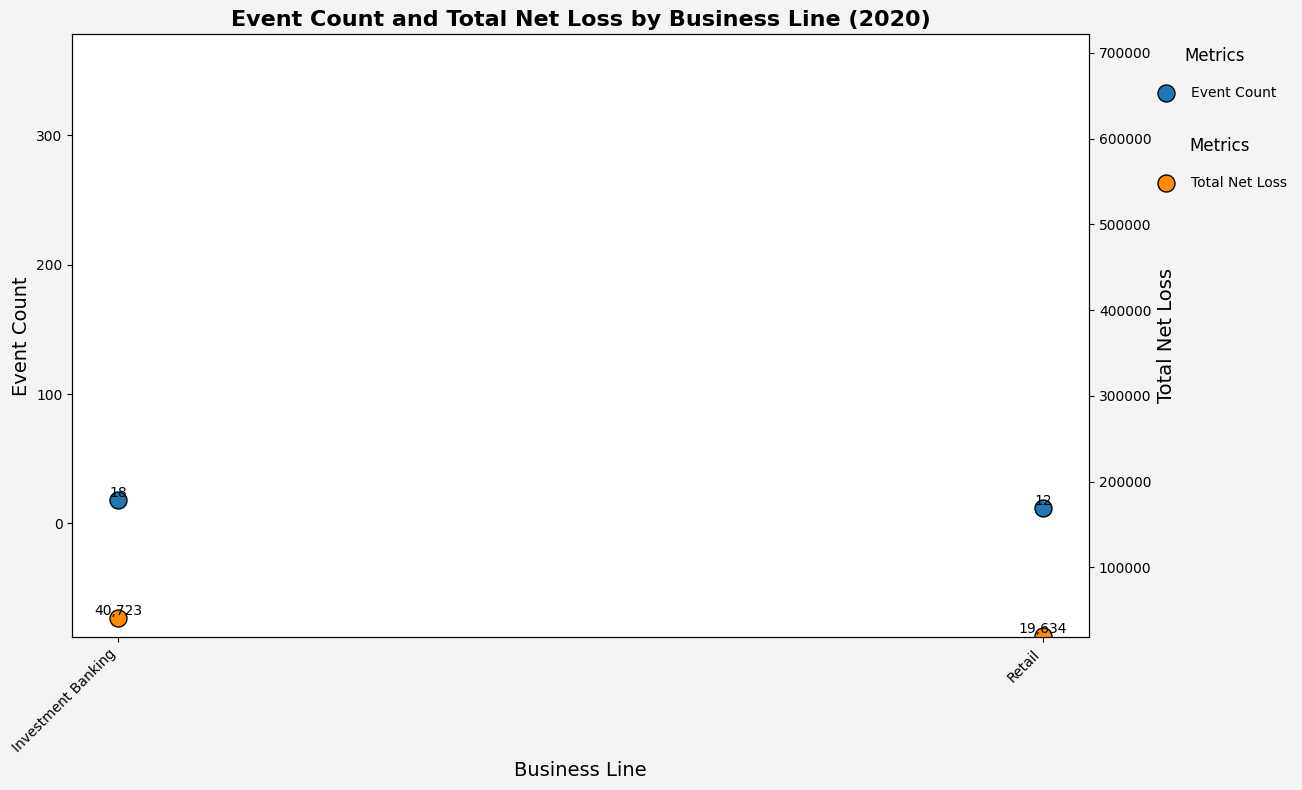

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


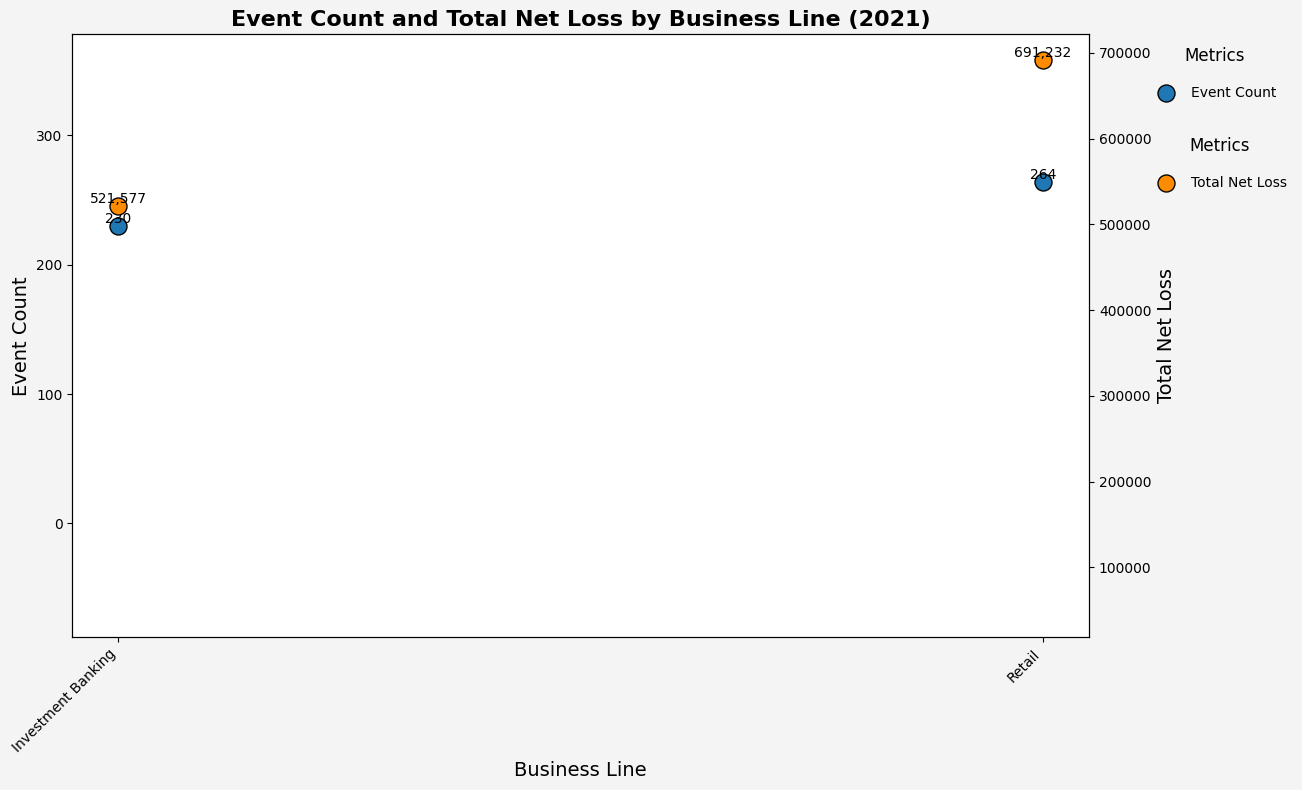

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


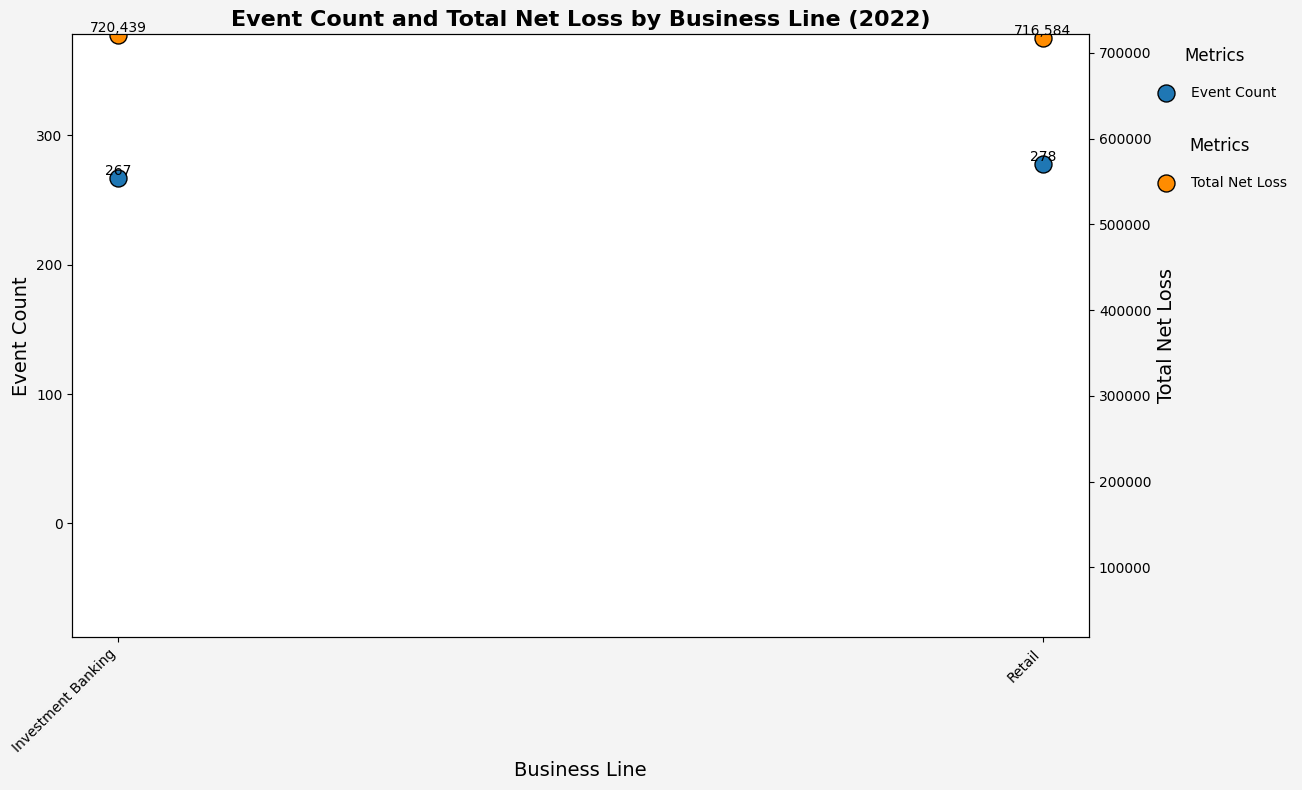

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


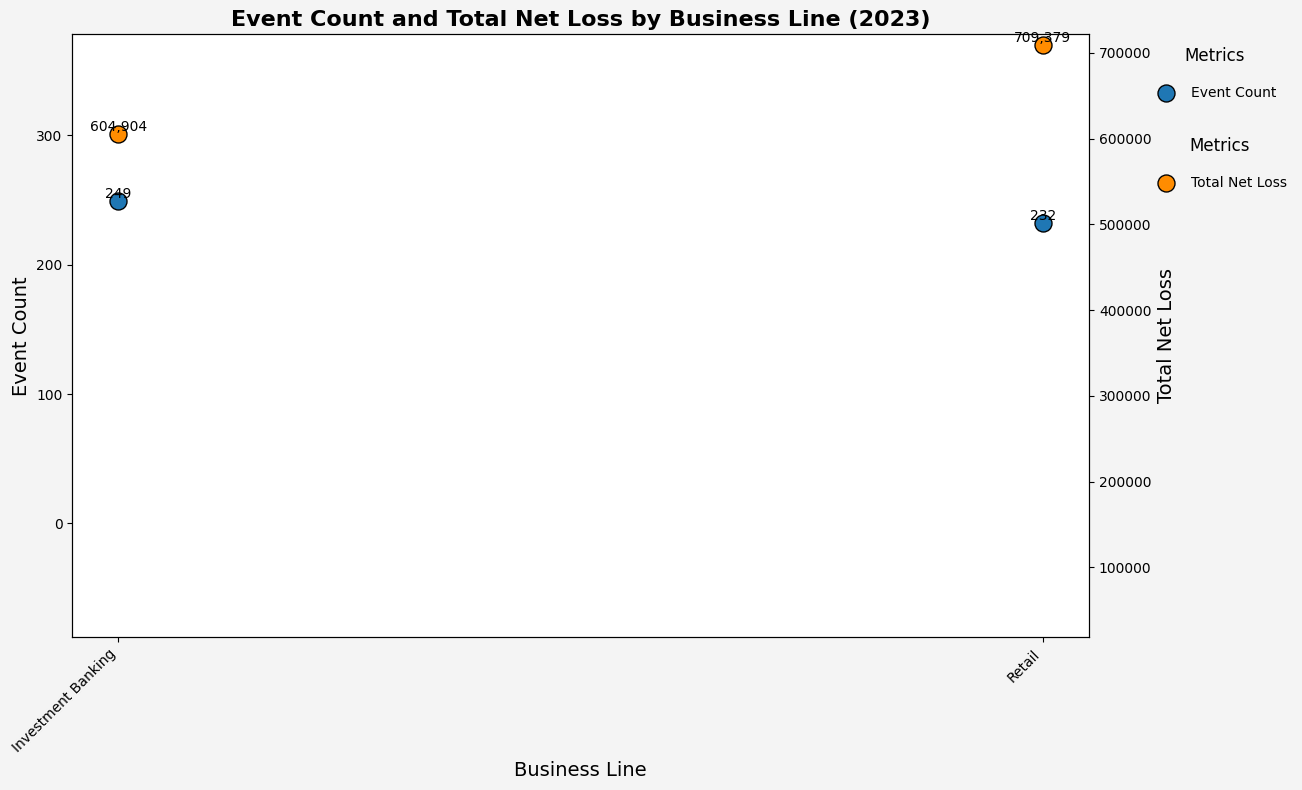

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1053562064.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


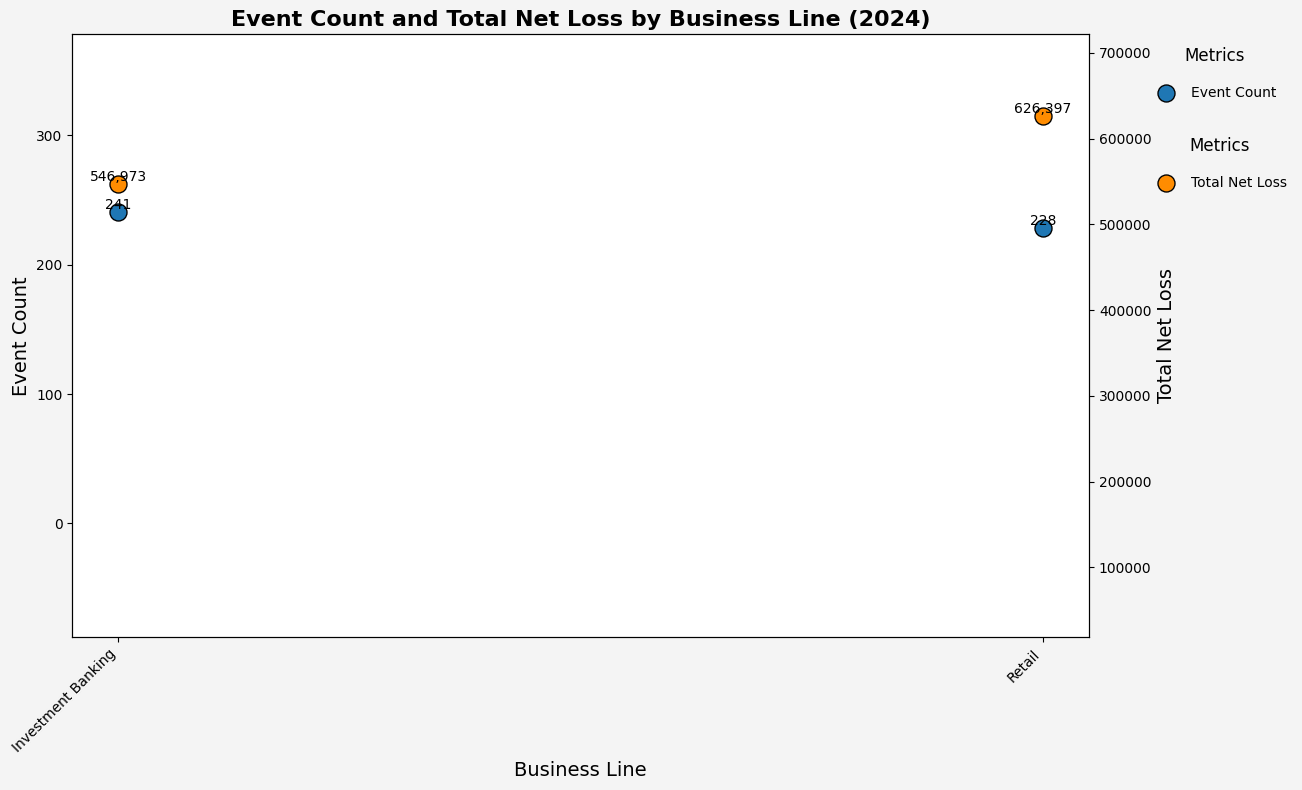

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (only positive values or 0)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values for Net Loss

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Filter for two specific business lines
filtered_business_lines = ["Retail", "Investment Banking"]  # Specify the business lines you are interested in
filtered_df = df[df['Business Line'].isin(filtered_business_lines)]

# Group by Business Line and Year, and calculate total Event Count and Net Loss
yearly_summary = filtered_df.groupby(["Business Line", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Business Line", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")

    # Set y-axis limits for Event Count (same for all years)
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add labels for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Business Line"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set y-axis limits for Total Net Loss (same for all years)
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add labels for Total Net Loss
    for i, row in year_data.iterrows():
        ax2.text(
            x=row["Business Line"], 
            y=row["Total_Net_Loss"], 
            s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Business Line ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


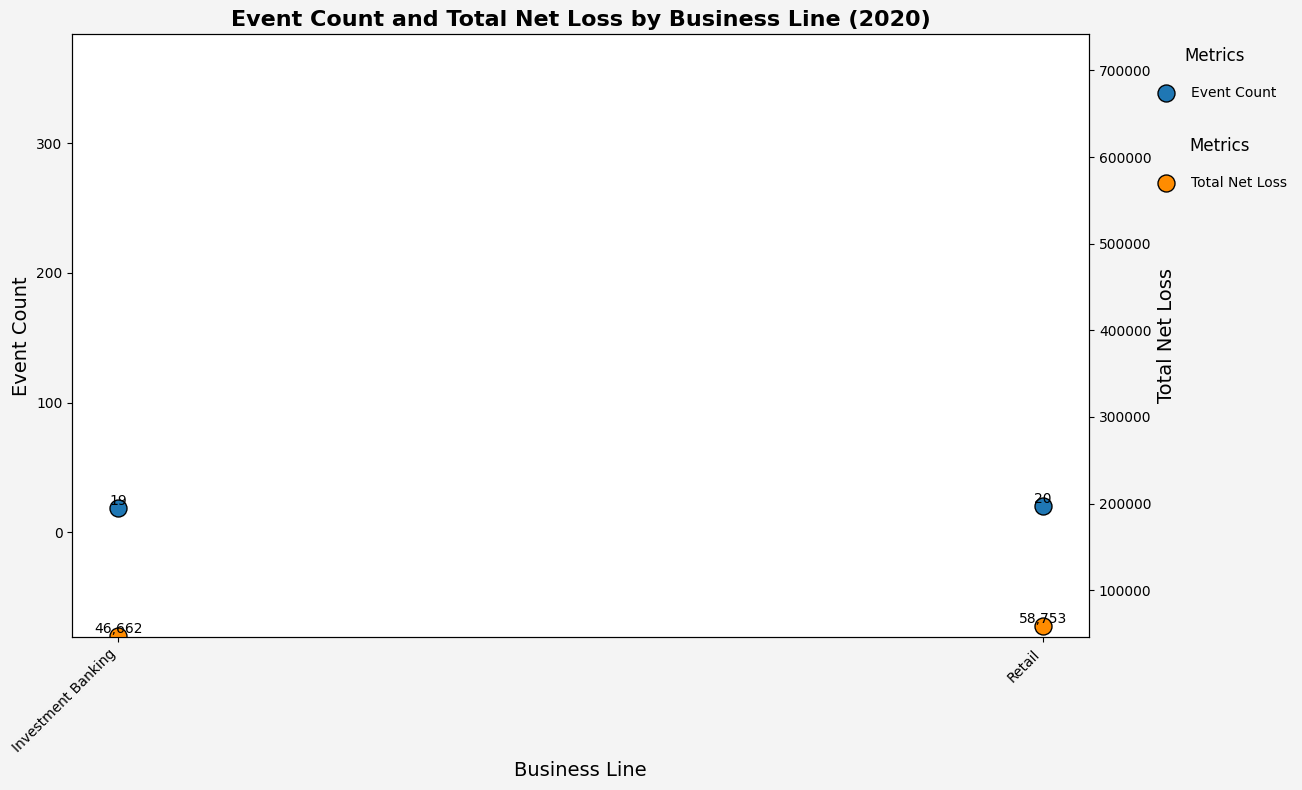

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


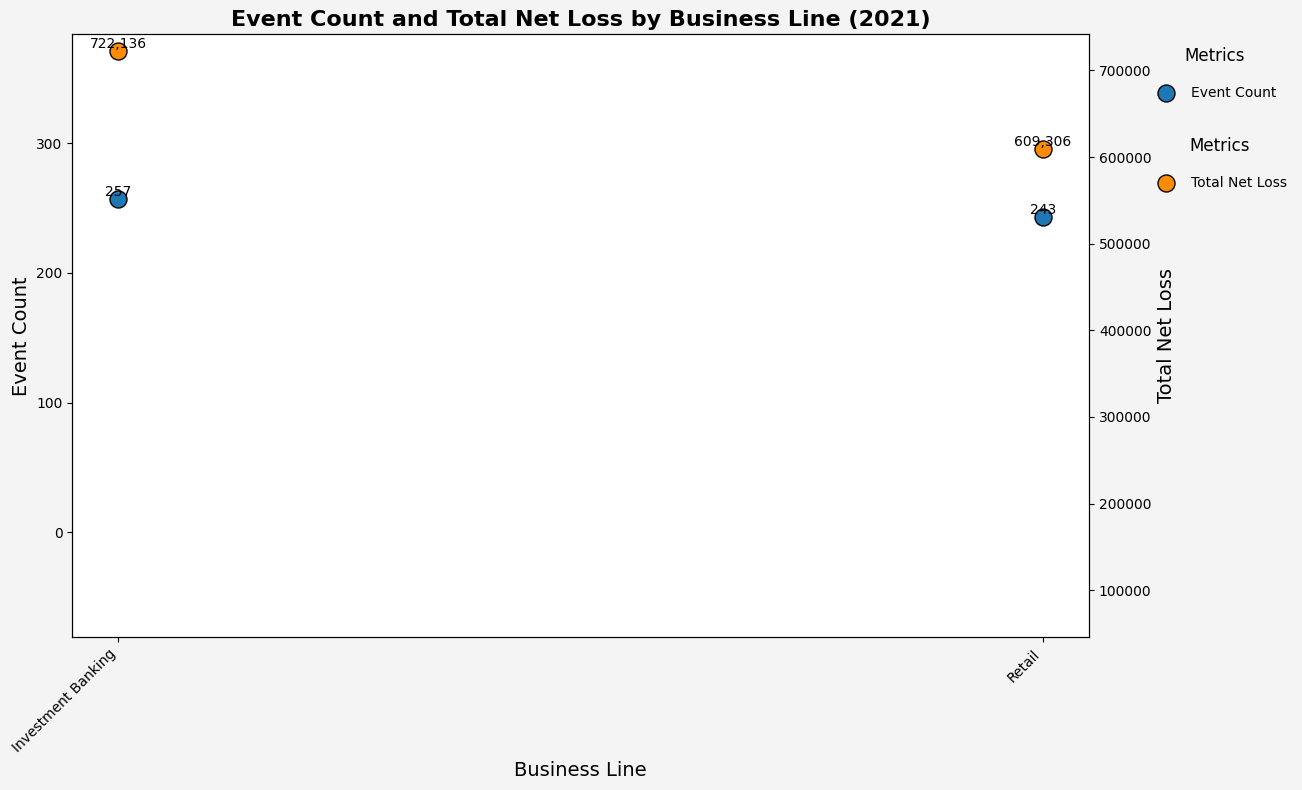

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


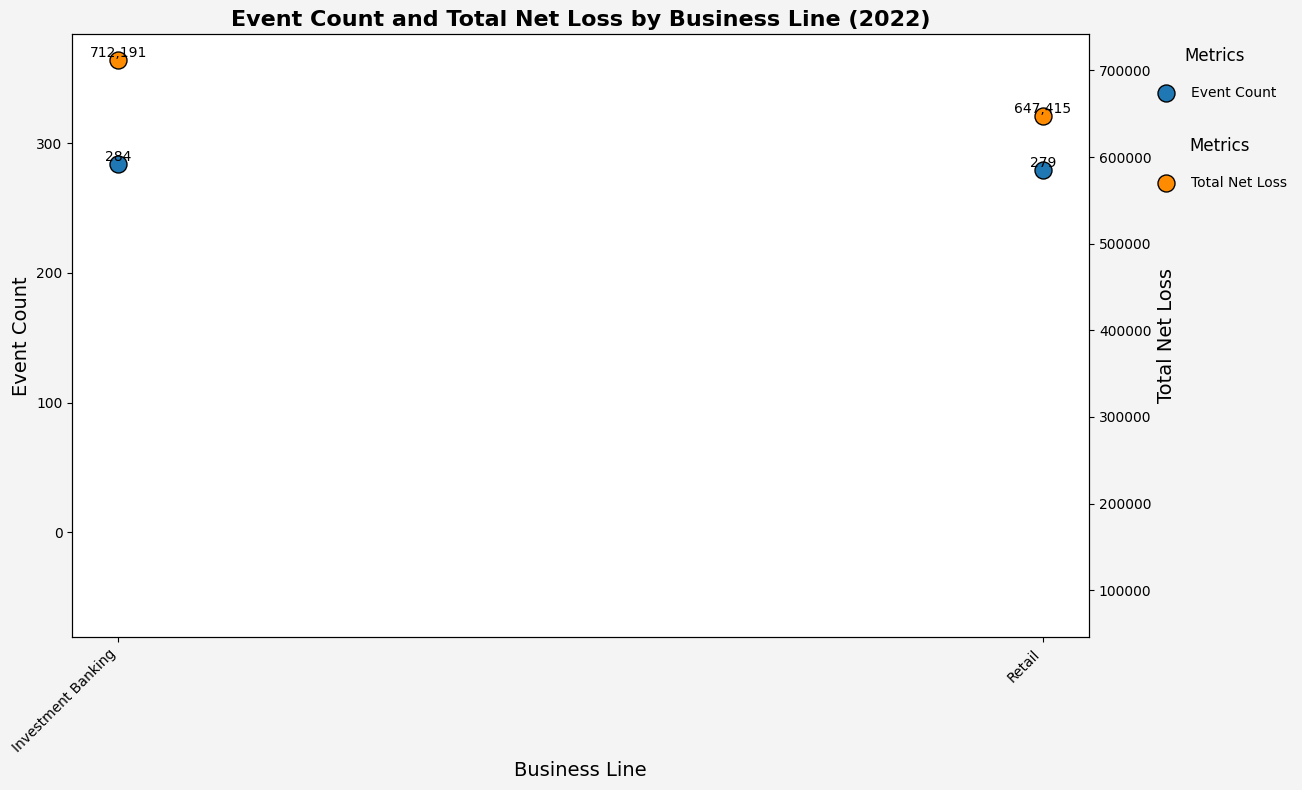

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


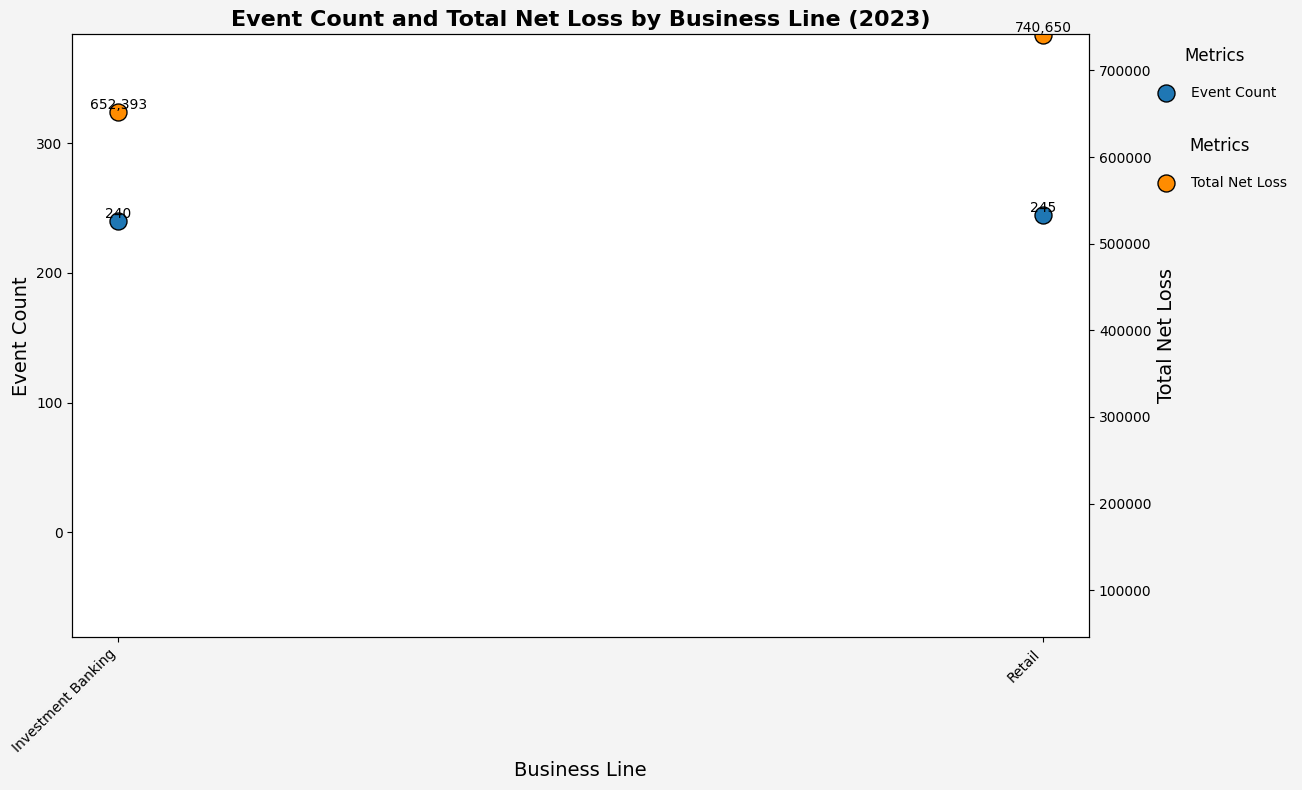

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_25700\1481823114.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


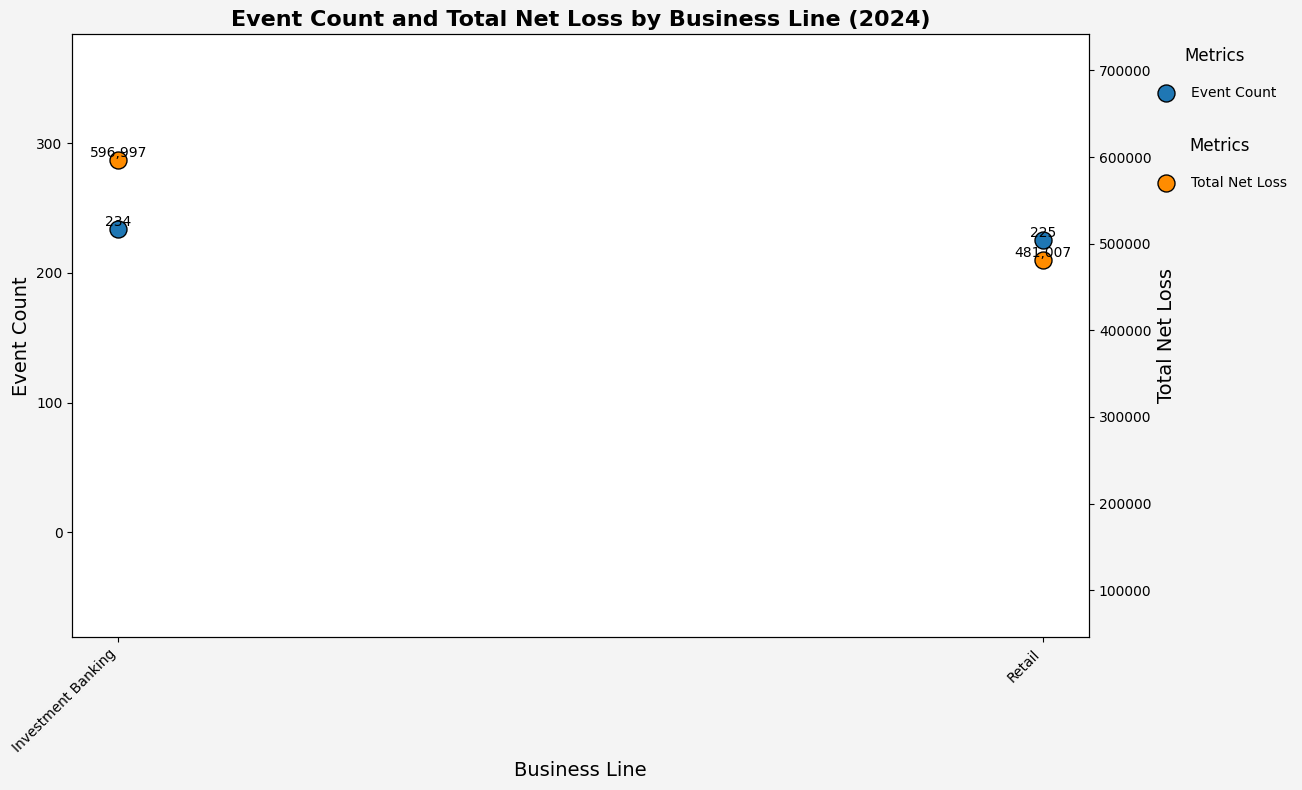

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (only positive values or 0)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values for Net Loss

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Filter for two specific business lines
filtered_business_lines = ["Retail", "Investment Banking"]  # Specify the business lines you are interested in
filtered_df = df[df['Business Line'].isin(filtered_business_lines)]

# Group by Business Line and Year, and calculate total Event Count and Net Loss
yearly_summary = filtered_df.groupby(["Business Line", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years for both Event Count and Total Net Loss
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Business Line", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")

    # Set consistent y-axis limits for Event Count
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add labels for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Business Line"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set consistent y-axis limits for Total Net Loss
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add labels for Total Net Loss
    for i, row in year_data.iterrows():
        ax2.text(
            x=row["Business Line"], 
            y=row["Total_Net_Loss"], 
            s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Business Line ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()
